### Begin by importing relevant packages.

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests
from scipy.stats import chisquare

In [165]:
filepath = r'C:\Users\casti\OneDrive\Documents\A Springboard\Capstone 2 - Global Terrorism\data\interim\gtdus_clean.csv'

df = pd.read_csv(filepath)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   eventid           3147 non-null   int64  
 1   date              3147 non-null   object 
 2   extended          3147 non-null   int64  
 3   provstate         3147 non-null   object 
 4   city              3147 non-null   object 
 5   latitude          3147 non-null   float64
 6   longitude         3147 non-null   float64
 7   specificity       3147 non-null   float64
 8   vicinity          3147 non-null   int64  
 9   summary           2098 non-null   object 
 10  crit1             3147 non-null   int64  
 11  crit2             3147 non-null   int64  
 12  crit3             3147 non-null   int64  
 13  success           3147 non-null   int64  
 14  suicide           3147 non-null   int64  
 15  attacktype1_txt   3147 non-null   object 
 16  targtype1_txt     3147 non-null   object 


### Since New York City is such a large city, I want to consolidate any use of "New York" to "New York City" to capture all info.

In [167]:
names = []
for name in df.city:
        if name == 'New York':
            names.append('New York City')
        else :
            names.append(name)

df.city = names
df.city.unique()

array(['Cairo', 'Oakland', 'Madison', 'Baraboo', 'Denver', 'Detroit',
       'Rio Piedras', 'New York City', 'Rio Grande', 'Seattle',
       'Champaign', 'Jersey City', 'South Sioux City', 'West Point',
       'Norwalk', 'Coral Gables', 'Portland', 'Akron', 'Dorado',
       'Carolina', 'Boston', 'Whitewater', 'Batavia', 'Ypsilanti',
       'Berkeley', 'Eugene', 'San Francisco', 'Buckeystown', 'Covington',
       'Cleveland', 'Vallejo', 'Hartford', 'Ithaca', 'Prairie du Sac',
       'Tucson', 'Boulder', 'Colorado Springs', 'Martinez', 'San Juan',
       'Ashville', 'Bridgeport', 'Albuquerque', 'Bel Air', 'Cambridge',
       'Chicago', 'Appleton', 'Long Beach', 'Billings', 'San Bernardino',
       'Los Angeles', 'Lockland', 'Washington', 'Orlando', 'Richmond',
       'Biggsville', 'Fort Benning', 'East Lansing', 'Houston', 'Pullman',
       'Trona', 'Lawrence', 'Baxter Springs', 'East St. Louis',
       'San Diego', 'Freeport', 'Kansas City', 'Milwaukee', 'Redlands',
       'Aguada', 'Pa

In [168]:
df.describe(include='all')

eventid        date     extended   provstate           city  \
count   3.147000e+03        3147  3147.000000        3147           3147   
unique           NaN        2226          NaN          54            827   
top              NaN  1971-08-22          NaN  California  New York City   
freq             NaN          10          NaN         634            482   
mean    1.987386e+11         NaN     0.005084         NaN            NaN   
std     1.689762e+09         NaN     0.071133         NaN            NaN   
min     1.970010e+11         NaN     0.000000         NaN            NaN   
25%     1.973012e+11         NaN     0.000000         NaN            NaN   
50%     1.981063e+11         NaN     0.000000         NaN            NaN   
75%     1.999116e+11         NaN     0.000000         NaN            NaN   
max     2.021063e+11         NaN     1.000000         NaN            NaN   

           latitude    longitude  specificity     vicinity  \
count   3147.000000  3147.000000  3147.000000  3147.000000   
unique          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN   
mean      36.714734   -92.176107     1.018748     0.022561   
std        7.521571    20.457583     0.232386     0.148523   
min      -84.671596  -158.081142     1.000000     0.000000   
25%       34.097866  -117.411102     1.000000     0.000000   
50%       38.908642   -85.512338     1.000000     0.000000   
75%       40.697132   -73.931351     1.000000     0.000000   
max       64.837778    34.056548     5.000000     1.000000   

                                                  summary  ...     nwoundte  \
count                                                2098  ...  3147.000000   
unique                                               2078  ...          NaN   
top     05/04/2002: Between the dates of May 3-7, 2002...  ...          NaN   
freq                                                    6  ...          NaN   
mean                                                  NaN  ...     0.036543   
std                                                   NaN  ...     1.223680   
min                                                   NaN  ...     0.000000   
25%                                                   NaN  ...     0.000000   
50%                                                   NaN  ...     0.000000   
75%                                                   NaN  ...     0.000000   
max                                                   NaN  ...    68.000000   

                     propextent_txt  \
count                          3147   
unique                            5   
top     Minor (likely < $1 million)   
freq                           1450   
mean                            NaN   
std                             NaN   
min                             NaN   
25%                             NaN   
50%                             NaN   
75%                             NaN   
max                             NaN   

                                                 addnotes       scite1  \
count                                                1319         3147   
unique                                               1261         1271   
top     This was one in a series of 11 incidents (1025...  Unspecified   
freq                                                   10         1049   
mean                                                  NaN          NaN   
std                                                   NaN          NaN   
min                                                   NaN          NaN   
25%                                                   NaN          NaN   
50%                                                   NaN          NaN   
75%                                                   NaN          NaN   
max                                                   NaN          NaN   

              dbsource      INT_LOG     INT_IDEO

### A brief description of columns reveals some interesting things. Most notably, I can tell that I'll need to engineer some numeric features based on categories, extraneous info, and potentially NLP from descriptions. Secondly, it looks like I have at least one longitude value in my latitude column and vice versa. 

### Let's begin with the lat/lon issue, then move on to loading and adding some population data. Then I'll visualize distributions and interactions.

In [169]:
df[df.latitude.astype(str).str.startswith('-')]

eventid        date  extended provstate     city   latitude  \
3132  202103160007  2021-03-16         0   Georgia  Acworth -84.671596   

      longitude  specificity  vicinity  \
3132  34.056548          1.0         1   

                                                summary  ...  nwoundte  \
3132  03/16/2021: An assailant opened fire at Young'...  ...         0   

      propextent_txt                                           addnotes  \
3132     Unspecified  The victims included Paul Andre Michels and El...   

                                                 scite1  \
3132  "What we know about Robert Aaron Long, the sus...   

                      dbsource INT_LOG INT_IDEO INT_MISC INT_ANY  \
3132  START Primary Collection      -9       -9        1       1   

                                       related  
3132  202103160007, 202103160008, 202103160009  

[1 rows x 45 columns]

### Found it! This should be an easy swap.

In [170]:
df.loc[df['eventid'] == 202103160007, ['latitude','longitude']] = df.loc[df['eventid'] == 202103160007, ['longitude','latitude']].values
df.loc[df['eventid'] == 202103160007, :]

eventid        date  extended provstate     city   latitude  \
3132  202103160007  2021-03-16         0   Georgia  Acworth  34.056548   

      longitude  specificity  vicinity  \
3132 -84.671596          1.0         1   

                                                summary  ...  nwoundte  \
3132  03/16/2021: An assailant opened fire at Young'...  ...         0   

      propextent_txt                                           addnotes  \
3132     Unspecified  The victims included Paul Andre Michels and El...   

                                                 scite1  \
3132  "What we know about Robert Aaron Long, the sus...   

                      dbsource INT_LOG INT_IDEO INT_MISC INT_ANY  \
3132  START Primary Collection      -9       -9        1       1   

                                       related  
3132  202103160007, 202103160008, 202103160009  

[1 rows x 45 columns]

In [171]:
df.describe()

eventid     extended     latitude    longitude  specificity  \
count  3.147000e+03  3147.000000  3147.000000  3147.000000  3147.000000   
mean   1.987386e+11     0.005084    36.752462   -92.213835     1.018748   
std    1.689762e+09     0.071133     7.203558    20.333817     0.232386   
min    1.970010e+11     0.000000     0.000000  -158.081142     1.000000   
25%    1.973012e+11     0.000000    34.097866  -117.411102     1.000000   
50%    1.981063e+11     0.000000    38.908642   -85.512338     1.000000   
75%    1.999116e+11     0.000000    40.697132   -73.931351     1.000000   
max    2.021063e+11     1.000000    64.837778     0.000000     5.000000   

          vicinity        crit1        crit2        crit3      success  ...  \
count  3147.000000  3147.000000  3147.000000  3147.000000  3147.000000  ...   
mean      0.022561     0.981570     0.981570     0.987925     0.825548  ...   
std       0.148523     0.134523     0.134523     0.109238     0.379558  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     1.000000     1.000000     1.000000     1.000000  ...   
50%       0.000000     1.000000     1.000000     1.000000     1.000000  ...   
75%       0.000000     1.000000     1.000000     1.000000     1.000000  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

             nkill      nkillus     nkillter        nwound     nwoundus  \
count  3147.000000  3147.000000  3147.000000   3147.000000  3147.000000   
mean      1.255799     1.176676     0.028916      8.429298     0.968224   
std      35.244947    34.201990     0.238111    275.215310    18.301762   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%       0.000000     0.000000     0.000000      0.000000     0.000000   
50%       0.000000     0.000000     0.000000      0.000000     0.000000   
75%       0.000000     0.000000     0.000000      0.000000     0.000000   
max    1385.000000  1361.000000     5.000000  10878.000000   751.000000   

          nwoundte      INT_LOG     INT_IDEO     INT_MISC      INT_ANY  
count  3147.000000  3147.000000  3147.000000  3147.000000  3147.000000  
mean      0.036543    -4.870035    -4.821417     0.072450    -4.446139  
std       1.223680     4.602296     4.661513     0.569818     4.760895  
min       0.000000    -9.000000    -9.000000    -9.000000    -9.000000  
25%       0.000000    -9.000000    -9.000000     0.000000    -9.000000  
50%       0.000000    -9.000000    -9.000000     0.000000    -9.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max      68.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 24 columns]

### Looks like I missed some more weird lat/long issues. I need to fix or remove the lat of 0 and long of -158, as those are not in the continental US.

In [172]:
df[df['latitude'].astype(str).str.startswith('0')].head()

eventid        date  extended provstate     city  latitude  \
1084  197601010002  1976-01-01         0   Unknown  Unknown       0.0   

      longitude  specificity  vicinity summary  ...  nwoundte  propextent_txt  \
1084        0.0          5.0         0     NaN  ...         0     Unspecified   

      addnotes       scite1                dbsource INT_LOG INT_IDEO INT_MISC  \
1084       NaN  Unspecified  CBRN Global Chronology      -9       -9        0   

     INT_ANY related  
1084      -9     NaN  

[1 rows x 45 columns]

In [173]:
df.drop([1084], inplace=True)

In [174]:
df[df['longitude'].astype(str).str.startswith('-158')].head()

eventid        date  extended provstate      city   latitude  \
3048  202005260018  2020-05-26         0    Hawaii  Kalaeloa  21.321632   

       longitude  specificity  vicinity  \
3048 -158.081142          1.0         0   

                                                summary  ...  nwoundte  \
3048  05/26/2020: Assailants set fire to offices ins...  ...         0   

                   propextent_txt  addnotes  \
3048  Minor (likely < $1 million)       NaN   

                                                 scite1  \
3048  "Kalaeloa church fire being investigated as ar...   

                      dbsource INT_LOG INT_IDEO INT_MISC INT_ANY related  
3048  START Primary Collection      -9       -9        0      -9     NaN  

[1 rows x 45 columns]

### This appears to be Hawaii. I should probably narrow this analysis down to continental US.

In [175]:
df.provstate.sort_values().unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'U.S. Virgin Islands', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [182]:
df[df['provstate'].isin(['Alaska','Hawaii','Puerto Rico','U.S. Virgin Islands'])]

eventid        date  extended            provstate  \
2817  201702280022  2017-02-28         0  U.S. Virgin Islands   
2818  201702280023  2017-02-28         0  U.S. Virgin Islands   
2819  201702280024  2017-02-28         0  U.S. Virgin Islands   

                       city   latitude  longitude  specificity  vicinity  \
2817       Charlotte Amalie  18.343232 -64.931757          1.0         0   
2818       Charlotte Amalie  18.343232 -64.931757          1.0         0   
2819  Charlotte Amalie West  18.338017 -64.960540          1.0         0   

                                                summary  ...  nwoundte  \
2817  02/28/2017: An assailant threw firebombs at th...  ...         0   
2818  02/28/2017: An assailant threw firebombs at th...  ...         0   
2819  02/28/2017: An assailant threw firebombs at a ...  ...         0   

                   propextent_txt  \
2817  Minor (likely < $1 million)   
2818                      Unknown   
2819                      Unknown   

                                               addnotes  \
2817  There is doubt that this incident meets terror...   
2818  There is doubt that this incident meets terror...   
2819  There is doubt that this incident meets terror...   

                                                 scite1  \
2817  "Federal offices in St. Thomas firebombed; sus...   
2818  "Federal offices in St. Thomas firebombed; sus...   
2819  "Federal offices in St. Thomas firebombed; sus...   

                      dbsource INT_LOG INT_IDEO INT_MISC INT_ANY  \
2817  START Primary Collection      -9       -9        1       1   
2818  START Primary Collection      -9       -9        1       1   
2819  START Primary Collection      -9       -9        1       1   

                                       related  
2817  201702280022, 201702280023, 201702280024  
2818  201702280022, 201702280023, 201702280024  
2819  201702280022, 201702280023, 201702280024  

[3 rows x 45 columns]

In [183]:
df = df[~df['provstate'].isin(['Alaska','Hawaii','Puerto Rico','U.S. Virgin Islands'])]

In [184]:
df.describe()

eventid     extended     latitude    longitude  specificity  \
count  2.889000e+03  2889.000000  2889.000000  2889.000000  2889.000000   
mean   1.987971e+11     0.005192    38.382382   -94.374570     1.008654   
std    1.734813e+09     0.071881     4.819902    19.374036     0.149773   
min    1.970010e+11     0.000000    25.699073  -124.238217     1.000000   
25%    1.972060e+11     0.000000    35.207255  -118.167056     1.000000   
50%    1.981101e+11     0.000000    39.176086   -87.681229     1.000000   
75%    2.001052e+11     0.000000    40.759505   -76.073792     1.000000   
max    2.021063e+11     1.000000    48.752350   -69.779646     4.000000   

          vicinity        crit1        crit2        crit3      success  ...  \
count  2889.000000  2889.000000  2889.000000  2889.000000  2889.000000  ...   
mean      0.021461     0.980270     0.981655     0.992385     0.831083  ...   
std       0.144939     0.139095     0.134220     0.086947     0.374743  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     1.000000     1.000000     1.000000     1.000000  ...   
50%       0.000000     1.000000     1.000000     1.000000     1.000000  ...   
75%       0.000000     1.000000     1.000000     1.000000     1.000000  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

             nkill      nkillus     nkillter        nwound     nwoundus  \
count  2889.000000  2889.000000  2889.000000   2889.000000  2889.000000   
mean      1.359640     1.277605     0.030807      9.161648     1.043960   
std      36.783625    35.695190     0.245639    287.233926    19.098116   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%       0.000000     0.000000     0.000000      0.000000     0.000000   
50%       0.000000     0.000000     0.000000      0.000000     0.000000   
75%       0.000000     0.000000     0.000000      0.000000     0.000000   
max    1385.000000  1361.000000     5.000000  10878.000000   751.000000   

          nwoundte      INT_LOG     INT_IDEO     INT_MISC      INT_ANY  
count  2889.000000  2889.000000  2889.000000  2889.000000  2889.000000  
mean      0.039806    -5.109034    -5.053306     0.070959    -4.688127  
std       1.277119     4.573221     4.644114     0.588572     4.759813  
min       0.000000    -9.000000    -9.000000    -9.000000    -9.000000  
25%       0.000000    -9.000000    -9.000000     0.000000    -9.000000  
50%       0.000000    -9.000000    -9.000000     0.000000    -9.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max      68.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 24 columns]

In [185]:
df.provstate.sort_values().unique()

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida',
       'Georgia', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

### Looks like my coordinates contain the continental US! 

### Before moving on to distributions and interactions, I'll load some population data taken from an open source on Github. This data was orginally scraped from a population database and loaded into a txt file. 

In [159]:
filepath2 = r'C:\Users\casti\OneDrive\Documents\A Springboard\Capstone 2 - Global Terrorism\data\interim\citypop.txt'
citypops = pd.read_csv(filepath2, skiprows=3, nrows = 1000)
citypops.city.replace(to_replace='New York',value='New York City',inplace=True)
print(citypops.head())
print(citypops.tail())

   rank           city         state  population 2000-2013 growth
0     1  New York City      New York     8405837             4.8%
1     2    Los Angeles    California     3884307             4.8%
2     3        Chicago      Illinois     2718782            -6.1%
3     4        Houston         Texas     2195914            11.0%
4     5   Philadelphia  Pennsylvania     1553165             2.6%
     rank          city      state  population 2000-2013 growth
995   996       Weslaco      Texas       37093            28.8%
996   997        Keizer     Oregon       37064            14.4%
997   998  Spanish Fork       Utah       36956            78.1%
998   999        Beloit  Wisconsin       36888             2.9%
999  1000   Panama City    Florida       36877             0.1%


### This dataset includes 1000 cities. How many are missing compared to the entries in my df?

In [186]:
missing = set(df.city) - set(citypops.city)
print(len(missing))
df[df.city.isin(missing)].info()

393
<class 'pandas.core.frame.DataFrame'>
Index: 550 entries, 0 to 3146
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   eventid           550 non-null    int64  
 1   date              550 non-null    object 
 2   extended          550 non-null    int64  
 3   provstate         550 non-null    object 
 4   city              550 non-null    object 
 5   latitude          550 non-null    float64
 6   longitude         550 non-null    float64
 7   specificity       550 non-null    float64
 8   vicinity          550 non-null    int64  
 9   summary           454 non-null    object 
 10  crit1             550 non-null    int64  
 11  crit2             550 non-null    int64  
 12  crit3             550 non-null    int64  
 13  success           550 non-null    int64  
 14  suicide           550 non-null    int64  
 15  attacktype1_txt   550 non-null    object 
 16  targtype1_txt     550 non-null    object 
 1

In [187]:
missing

{'Acworth',
 'Afton',
 'Alamogordo',
 'Albertville',
 'Albion',
 'Altadena',
 'Alto',
 'Alton',
 'Amherst',
 'Anamosa',
 'Andrews',
 'Aptos',
 'Arcata',
 'Arivaca',
 'Asbury',
 'Ashland',
 'Ashville',
 'Astoria',
 'Athens',
 'Atherton',
 'Atkins',
 'Augusta',
 'Axton',
 'Aztec',
 "Bailey's Crossroads",
 'Baraboo',
 'Barnegat',
 'Batavia',
 'Baxter Springs',
 'Bedford Park',
 'Bel Air',
 'Belmont',
 'Ben Lomond',
 'Berlin',
 'Bessemer',
 'Bethesda',
 'Beverly Hills',
 'Biggsville',
 'Blooming Grove',
 'Bluefield',
 'Boise',
 'Bonners Ferry',
 'Boulder City',
 'Brainerd',
 'Braintree',
 'Brewster',
 'Bridgeton',
 'Brighton',
 'Brookline',
 'Brooklyn Center',
 'Brunswick',
 'Buckeystown',
 'Buena Vista County',
 'Bullard',
 'Bunkerville',
 'Burlingame',
 'Burns',
 'Cairo',
 'Camano',
 'Campbelltown',
 'Capitol Heights',
 'Capitola',
 'Carlisle',
 'Carmichael',
 'Century',
 'Chantilly',
 'Chappaqua',
 'Cherry Hill',
 'Chester',
 'Claremont',
 'Clatskanie',
 'Cle Elum',
 'Cloverdale',
 "Coe

### I'm missing 393 city populations. But, I can tell a few things just from glancing at this list.

### First, there is a typo in 'MIami' in my df. Second, some cities may be listed as "Saint..." or "St...", or "Mount.." or "Mt...". I'll correct these to long form in both datasets for consistency. I also see an oddball: Nashville-Davidson for Nashville.

In [188]:
df.city.replace('MIami','Miami',inplace=True)
citypops.city.replace(to_replace='New York', value='New York City',inplace=True)
citypops.city.replace(to_replace=r'^St\.',value='Saint',regex=True, inplace=True)
df.city.replace(to_replace=r'^St\.',value='Saint',regex=True, inplace=True)
citypops.city.replace(to_replace=r'^Mt\.',value='Mount',regex=True, inplace=True)
df.city.replace(to_replace=r'^Mt\.',value='Mount',regex=True, inplace=True)
citypops.city.replace(to_replace='Nashville-Davidson',value='Nashville',inplace=True)

In [206]:
missing = set(df.city) - set(citypops.city)
print(len(missing))
print(df[df.city.isin(missing)].info())
df[df.city.isin(missing)].city.value_counts().head()

391
<class 'pandas.core.frame.DataFrame'>
Index: 542 entries, 0 to 3146
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   eventid           542 non-null    int64  
 1   date              542 non-null    object 
 2   extended          542 non-null    int64  
 3   provstate         542 non-null    object 
 4   city              542 non-null    object 
 5   latitude          542 non-null    float64
 6   longitude         542 non-null    float64
 7   specificity       542 non-null    float64
 8   vicinity          542 non-null    int64  
 9   summary           449 non-null    object 
 10  crit1             542 non-null    int64  
 11  crit2             542 non-null    int64  
 12  crit3             542 non-null    int64  
 13  success           542 non-null    int64  
 14  suicide           542 non-null    int64  
 15  attacktype1_txt   542 non-null    object 
 16  targtype1_txt     542 non-null    object 
 1

city
Cairo               12
Oxford               7
South Sioux City     7
Trona                6
Coeur D'Alene        5
Name: count, dtype: int64

### My corrections were mildly helpful. I'm still missing 391 city populations. However, none of my missing cities record more than 12 incidents. Even though it amounts to 542 incidents, I will proceed without these city populations. As the analysis progresses, I will have to either remove or categorize these cities some other way - for now, I can still glean other info from the data provided.

In [104]:
import requests
from bs4 import BeautifulSoup

def get_population(city):
    url = f'https://en.wikipedia.org/wiki/{city.replace(" ", "_")}'
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Search for population-related keywords in the entire HTML content
        population_keywords = ['population', 'demographics']
        for keyword in population_keywords:
            population_element = soup.find(string=lambda text: keyword in str(text).lower())
            if population_element:
                # Navigate to the nearest ancestor that contains population information
                population_data = population_element.find_next('td')
                if population_data:
                    population_text = population_data.get_text(strip=True)
                    if population_text:
                        return population_text
                
    return None

cities = missing # Example list of cities
citynames = list(citypops.city)
popcols = list(citypops.population)
no_pop = []
for city in cities:
    population = get_population(city)
    if population is not None:
        try:
            population_int = int(population)
            citynames.append(city)
            popcols.append(population_int)
        except ValueError:
            no_pop.append(city)
    else:
        no_pop.append(city)

In [127]:
no_pop

['Oneonta',
 'Menlo Park',
 'Vivian',
 'Brooklyn Center',
 'Boulder City',
 'Thonotosassa',
 'Chappaqua',
 'Claremont',
 'Lathrup Village',
 'Fairton',
 'Lakeside',
 'Bethesda',
 'Webster',
 'Los Gatos',
 'Wakefield',
 'Kailua',
 'Ypsilanti',
 'Jeffersontown',
 'Los Altos Hills',
 'Lake Worth',
 'Falls Church',
 'Fort Benning',
 'Westmont',
 'McLean',
 'Hyattsville',
 'Vail',
 'Cumming',
 'Dalton',
 'Oakwood',
 'Nassau county',
 'Storrs',
 'Folcroft',
 'Port Barre',
 'Lakedale',
 'Manning',
 'Suitland',
 'Medina',
 'Lilburn',
 'Braintree',
 'Greencastle',
 'Willow Street',
 'Blooming Grove',
 'Maryland Heights',
 'Sunland Park',
 'Century',
 'Hudson Bend',
 'Nome',
 'Temple Terrace',
 'New London',
 'Lansdowne',
 'Williamsport',
 'Weehawken',
 'Jennings',
 'Amherst',
 'Tomah',
 'Parkland',
 'Laramie',
 'Beverly Hills',
 'Alamogordo',
 'Brighton',
 'Fort Davis',
 'Mount Gilead',
 'Corinth',
 'Boise',
 'Rotterdam',
 'Dulles',
 'Rajneeshpurram',
 'Doraville',
 'Cloverdale',
 'Martiny',
 '

In [211]:
citypops_trim = citypops[['city','state','population']]
citypops_trim

city         state  population
0    New York City      New York     8405837
1      Los Angeles    California     3884307
2          Chicago      Illinois     2718782
3          Houston         Texas     2195914
4     Philadelphia  Pennsylvania     1553165
..             ...           ...         ...
995        Weslaco         Texas       37093
996         Keizer        Oregon       37064
997   Spanish Fork          Utah       36956
998         Beloit     Wisconsin       36888
999    Panama City       Florida       36877

[1000 rows x 3 columns]

In [235]:
dfp = df.merge(citypops_trim, how='left', on='city')
dfp.head(20)

eventid        date  extended    provstate              city  \
0   197001010002  1970-01-01         0     Illinois             Cairo   
1   197001020002  1970-01-02         0   California           Oakland   
2   197001020003  1970-01-02         0    Wisconsin           Madison   
3   197001020003  1970-01-02         0    Wisconsin           Madison   
4   197001030001  1970-01-03         0    Wisconsin           Madison   
5   197001030001  1970-01-03         0    Wisconsin           Madison   
6   197001050001  1970-01-01         0    Wisconsin           Baraboo   
7   197001060001  1970-01-06         0     Colorado            Denver   
8   197001090001  1970-01-09         0     Michigan           Detroit   
9   197001120001  1970-01-12         0     New York     New York City   
10  197001130001  1970-01-13         0   Washington           Seattle   
11  197001140001  1970-01-14         0     Illinois         Champaign   
12  197001190002  1970-01-19         0   Washington           Seattle   
13  197001190003  1970-01-19         0   Washington           Seattle   
14  197001190004  1970-01-19         0   New Jersey       Jersey City   
15  197001220002  1970-01-22         0     Nebraska  South Sioux City   
16  197001250001  1970-01-25         0  Mississippi        West Point   
17  197001250002  1970-01-25         0     New York     New York City   
18  197001260001  1970-01-26         0  Mississippi        West Point   
19  197001260003  1970-01-26         0     New York     New York City   

     latitude   longitude  specificity  vicinity  \
0   37.005105  -89.176269          1.0         0   
1   37.791927 -122.225906          1.0         0   
2   43.076592  -89.412488          1.0         0   
3   43.076592  -89.412488          1.0         0   
4   43.072950  -89.386694          1.0         0   
5   43.072950  -89.386694          1.0         0   
6   43.468500  -89.744299          1.0         0   
7   39.758968 -104.876305          1.0         0   
8   42.331685  -83.047924          1.0         0   
9   40.697132  -73.931351          1.0         0   
10  47.610786 -122.331306          1.0         0   
11  40.116748  -88.239270          1.0         0   
12  47.610786 -122.331306          1.0         0   
13  47.610786 -122.331306          1.0         0   
14  40.717892  -74.067467          1.0         0   
15  42.470310  -96.413949          1.0         0   
16  33.606510  -88.650419          1.0         0   
17  40.697132  -73.931351          1.0         0   
18  33.606510  -88.650419          1.0         0   
19  40.697132  -73.931351          1.0         0   

                                              summary  ...  \
0   1/1/1970: Unknown African American assailants ...  ...   
1   1/2/1970: Unknown perpetrators detonated explo...  ...   
2   1/2/1970: Karl Armstrong, a member of the New ...  ...   
3   1/2/1970: Karl Armstrong, a member of the New ...  ...   
4   1/3/1970: Karl Armstrong, a member of the New ...  ...   
5   1/3/1970: Karl Armstrong, a member of the New ...  ...   
6                                                 NaN  ...   
7   1/6/1970: Unknown perpetrators threw a Molotov...  ...   
8   1/9/1970: Unknown perpetrators set off a fireb...  ...   
9   1/12/1970: Unknown perpetrators threw a pipe b...  ...   
10  1/13/1970: Unknown perpetrators firebombed Fus...  ...   
11  1/14/1970: Suspected Black militants threw two...  ...   
12  1/17/1970: Three African Americans were suspec...  ...   
13  1/17/1970: Silas and Judith Bissell placed an ...  ...   
14  1/19/1970: Unknown perpetrators ignited a fire...  ...   
15  1/22/1970: Unknown perpetrators detonated an e...  ...   
16  1/25/1970: Unknown perpetrators burnt down a b...  ...   
17  1/25/1970: Responding to what authorities beli...  ...   
18  1/26/1970: Unknown African American assailants...  ...   
19  1/26/1970: Police officer Joseph Blik was on f...  ...   

                                             addnotes  \
0   The Cairo Chief of

### A general approach begins by looking a some variables of interest. How are they distributed?

In [241]:
df_analyze = dfp[['success','suicide','nkill','nwound','nkillter','attacktype1_txt','targtype1_txt','weaptype1_txt','propextent_txt']]

In [242]:
dfp.city.value_counts()

city
New York City    482
Los Angeles      114
San Francisco    102
Washington        93
Miami             88
                ... 
Worcester          1
Syracuse           1
Cloverdale         1
Freedom            1
Winthrop           1
Name: count, Length: 777, dtype: int64

In [247]:
feat_of_int = ['success','suicide','nkill','nwound','nkillter','attacktype1_txt','targtype1_txt','weaptype1_txt','propextent_txt']

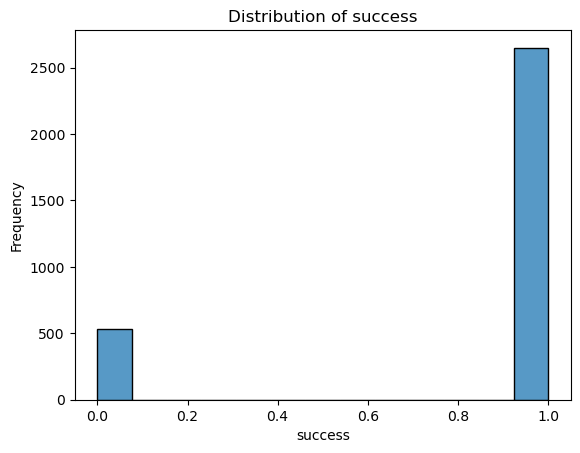

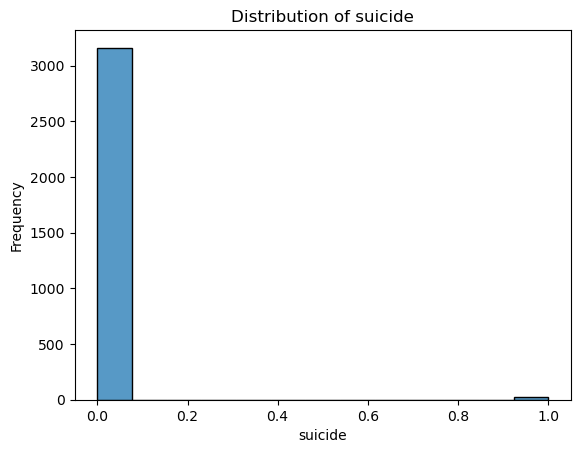

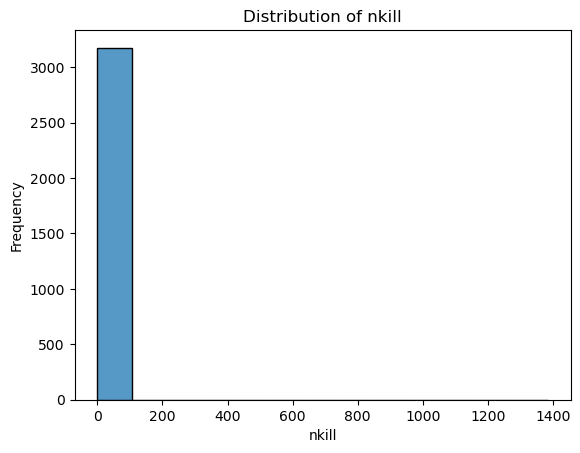

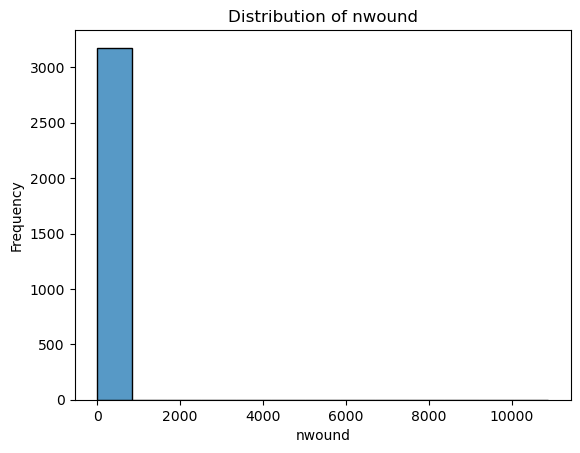

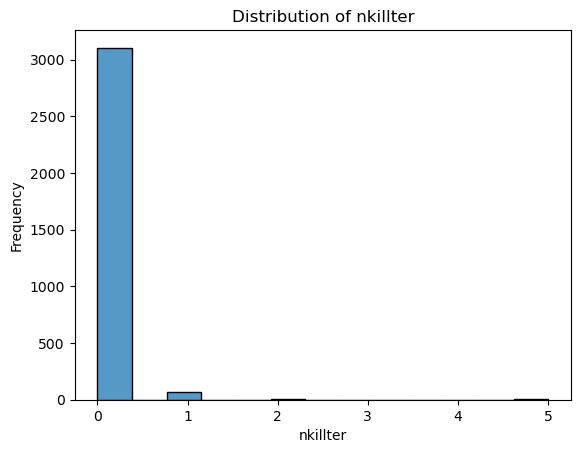

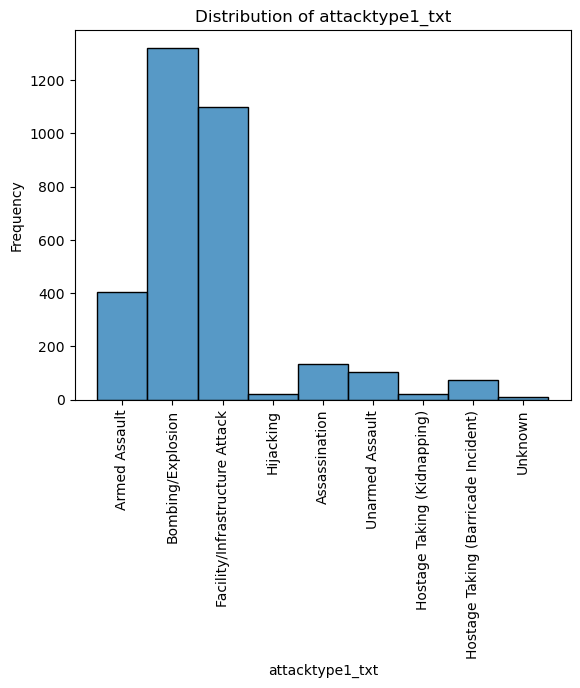

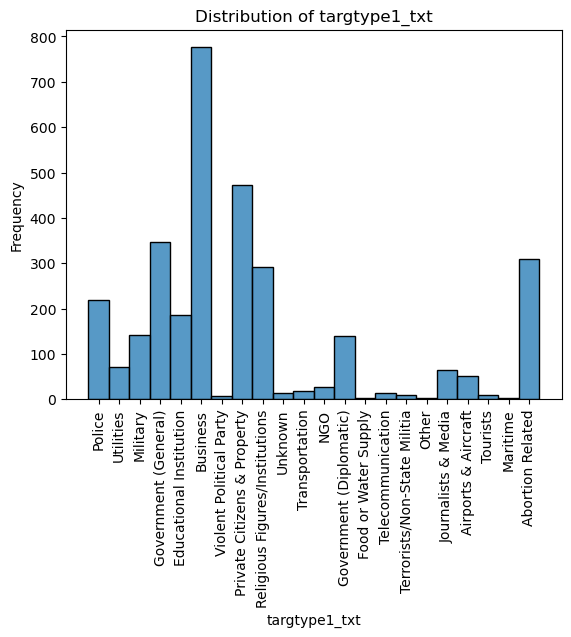

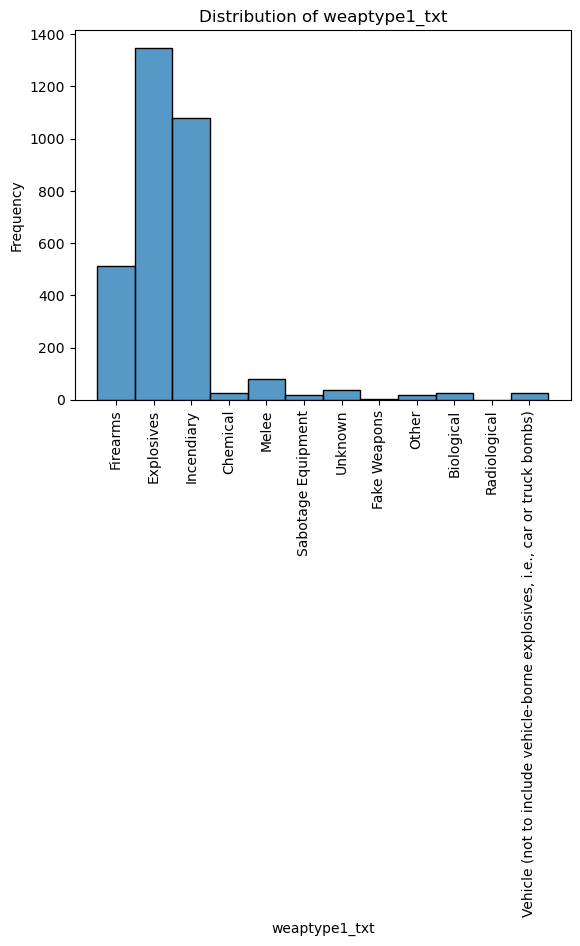

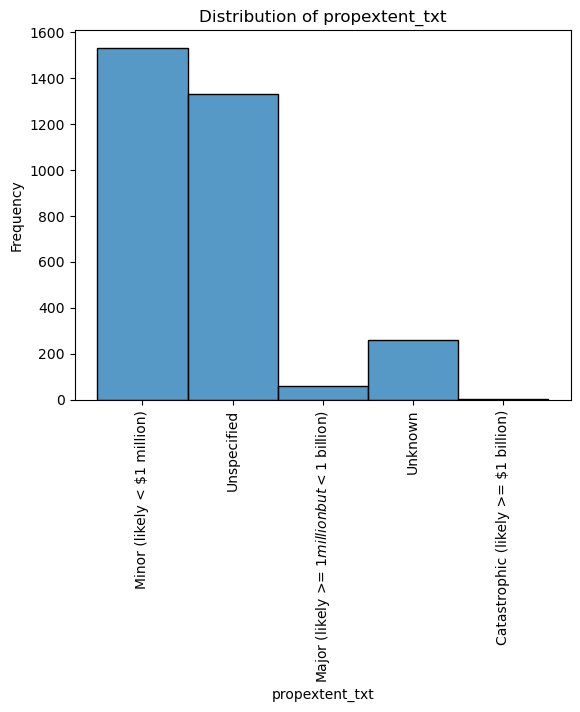

In [248]:
for feature in feat_of_int :
    sns.histplot(dfp[feature])
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    if dfp[feature].dtype == 'object' :
        plt.xticks(rotation = 90)
    plt.show();

### Here's what we need to do. 

### We want to know what factors are involved in the determination of target type, attack type, and group affiliation according to this data. 

### This means I need distributions/plots of these three variables across several different metrics and relationships (feature vs population, feature vs median income (state), feature vs political/religious affiliation

### I also need timelines: feature over time per population range, income range, per poltical/religious affiliation, etc.

In [11]:
def cityhist(df, city) :
    features = list(df_analyze.columns)
    fig, ax = plt.subplots(nrows=1, ncols=(len(features) - 1), figsize = (25,7))
    total_count = df_city_10[df_city_10['city'] == city].eventid.count()
    print("*" * 50)
    print(f"Distribution of features in {city}")
    print("*" * 50)
    print(f'{city} total incidents: {total_count}')
    for i, feature in enumerate(features[1:]) :
        sns.histplot(x=feature, data=df[df['city'] == city], ax=ax[i])
        ax[i].set_title(feature)
        ax[i].set_xlabel(feature)
        ax[i].tick_params(axis='x', rotation=90)
        
        max_ticks = 5  
        values = df[feature].value_counts().index[:max_ticks]  
        ax[i].set_xticks(values)
        ax[i].set_xticklabels(values) 
        
    plt.tight_layout()
    #plt.subplots_adjust(wspace=5)
    plt.show();

In [249]:
vc = dfp['city'].value_counts()
city_of_int = vc[vc >= 25].index.tolist()
df_city_25 = dfp[dfp['city'].isin(city_of_int)]
df_city_25.city.value_counts()

city
New York City    482
Los Angeles      114
San Francisco    102
Washington        93
Miami             88
Chicago           59
Portland          54
Seattle           43
Kansas City       42
Columbus          36
Bloomington       36
Springfield       35
Berkeley          34
Name: count, dtype: int64

In [13]:
cities_20 = [x for x in df_city_20.city.unique()]
for x in cities_10:
    cityhist(x)

NameError: name 'df_city_20' is not defined

### The patterns are similar to the overview, but certain cities are more prone to certain attacks. While businesses are the primary target in most cities, Houston and Washington have more government-related targets. The extent of property damage also varies between cities. 

### The variables of greatest interest as it relates to city patterns are attack type, target type, weapon type, and property extent. What is the proportion of each of these features occuring in each city? 

### After some trial and error, I've defined a function below that displays a dataframe of proportions of feature per city as well as a bar chart of relative proportions (essentially a normalized histogram). 

In [14]:
def proportionhist(feature) :
    print("*" * 50)
    print(f"Observed Proportions of {feature} in each city")
    print("*" * 50)
    probdf = pd.DataFrame()
    citylist = [x for x in df_city_25.city.unique()]
    for city in citylist:
        counts = df[df.city == city][feature].value_counts()
        ind = [i for i in counts.index]
        proportion = [x/counts.sum() for x in counts]
        myd = dict(zip(ind,proportion))
        newdf = pd.DataFrame.from_dict(myd,orient='index')
        newdf.rename(columns = {0:city}, inplace=True)
        probdf = pd.concat([probdf, newdf], axis=1)
    probdf.fillna(0, inplace=True)
    display(probdf)
    #display(pd.DataFrame(probdf.value_counts().sort_values(ascending=False)).iloc[(0:3, -3:])
    
    # Modify to show the 4 highest and 4 lowest cities of each feature.

    probdf_long = probdf.reset_index().melt(id_vars='index', var_name='City', value_name='Proportion')
    # Create the histogram using seaborn
    plt.figure(figsize=(12, 6))
    sns.barplot(data=probdf_long, x='index', y='Proportion', hue='City', palette='deep')
    plt.xlabel(feature)
    plt.ylabel('Proportion per city')
    plt.title(f'Distribution of {feature} by City')
    plt.xticks(rotation=90)
    plt.legend(title='City')
    plt.show()
    

**************************************************
Observed Proportions of attacktype1_txt in each city
**************************************************


New York City   Seattle  Portland  \
Bombing/Explosion                         0.572614  0.604651  0.407407   
Facility/Infrastructure Attack            0.195021  0.232558  0.444444   
Armed Assault                             0.103734  0.116279  0.074074   
Unarmed Assault                           0.047718  0.023256  0.037037   
Assassination                             0.043568  0.000000  0.000000   
Hostage Taking (Barricade Incident)       0.016598  0.000000  0.037037   
Hijacking                                 0.012448  0.023256  0.000000   
Hostage Taking (Kidnapping)               0.006224  0.000000  0.000000   
Unknown                                   0.002075  0.000000  0.000000   

                                     Berkeley  San Francisco  San Juan  \
Bombing/Explosion                    0.705882       0.529412  0.689655   
Facility/Infrastructure Attack       0.205882       0.088235  0.068966   
Armed Assault                        0.029412       0.235294  0.060345   
Unarmed Assault                      0.000000       0.019608  0.000000   
Assassination                        0.029412       0.088235  0.103448   
Hostage Taking (Barricade Incident)  0.000000       0.009804  0.025862   
Hijacking                            0.000000       0.000000  0.000000   
Hostage Taking (Kidnapping)          0.029412       0.029412  0.017241   
Unknown                              0.000000       0.000000  0.034483   

                                      Chicago  Los Angeles  Washington  \
Bombing/Explosion                    0.694915     0.692982    0.548387   
Facility/Infrastructure Attack       0.152542     0.184211    0.139785   
Armed Assault                        0.067797     0.035088    0.129032   
Unarmed Assault                      0.000000     0.035088    0.086022   
Assassination                        0.033898     0.052632    0.043011   
Hostage Taking (Barricade Incident)  0.016949     0.000000    0.053763   
Hijacking                            0.000000     0.000000    0.000000   
Hostage Taking (Kidnapping)          0.033898     0.000000    0.000000   
Unknown                              0.000000     0.000000    0.000000   

                                        Miami  
Bombing/Explosion                    0.735632  
Facility/Infrastructure Attack       0.114943  
Armed Assault                        0.022989  
Unarmed Assault                      0.000000  
Assassination                        0.091954  
Hostage Taking (Barricade Incident)  0.000000  
Hijacking                            0.011494  
Hostage Taking (Kidnapping)          0.000000  
Unknown                              0.022989

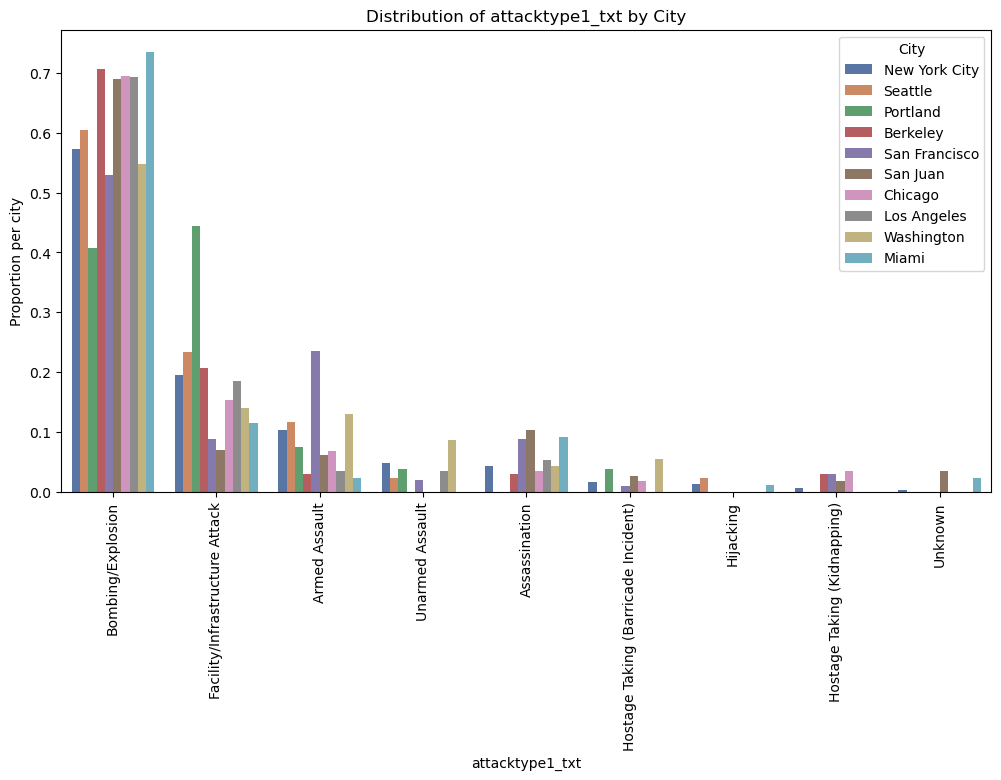

**************************************************
Observed Proportions of targtype1_txt in each city
**************************************************


New York City   Seattle  Portland  Berkeley  \
Business                             0.383817  0.395349  0.111111  0.411765   
Government (Diplomatic)              0.151452  0.000000  0.000000  0.000000   
Private Citizens & Property          0.109959  0.139535  0.148148  0.000000   
Government (General)                 0.072614  0.116279  0.259259  0.000000   
Police                               0.070539  0.023256  0.037037  0.176471   
Airports & Aircraft                  0.037344  0.023256  0.000000  0.000000   
Military                             0.037344  0.069767  0.074074  0.029412   
Religious Figures/Institutions       0.026971  0.093023  0.000000  0.029412   
Journalists & Media                  0.022822  0.000000  0.000000  0.029412   
Educational Institution              0.022822  0.116279  0.074074  0.294118   
Tourists                             0.012448  0.000000  0.000000  0.000000   
NGO                                  0.012448  0.000000  0.000000  0.000000   
Terrorists/Non-State Militia         0.010373  0.000000  0.037037  0.000000   
Transportation                       0.010373  0.000000  0.000000  0.000000   
Abortion Related                     0.008299  0.000000  0.222222  0.000000   
Other                                0.002075  0.000000  0.000000  0.000000   
Unknown                              0.002075  0.000000  0.000000  0.000000   
Violent Political Party              0.002075  0.000000  0.000000  0.000000   
Food or Water Supply                 0.002075  0.000000  0.000000  0.000000   
Telecommunication                    0.002075  0.000000  0.037037  0.000000   
Utilities                            0.000000  0.023256  0.000000  0.029412   
Maritime                             0.000000  0.000000  0.000000  0.000000   

                                San Francisco  San Juan   Chicago  \
Business                             0.205882  0.362069  0.322034   
Government (Diplomatic)              0.088235  0.060345  0.033898   
Private Citizens & Property          0.303922  0.043103  0.084746   
Government (General)                 0.127451  0.181034  0.203390   
Police                               0.127451  0.051724  0.118644   
Airports & Aircraft                  0.009804  0.008621  0.016949   
Military                             0.029412  0.181034  0.101695   
Religious Figures/Institutions       0.019608  0.000000  0.016949   
Journalists & Media                  0.019608  0.017241  0.000000   
Educational Institution              0.009804  0.017241  0.050847   
Tourists                             0.000000  0.000000  0.000000   
NGO                                  0.009804  0.000000  0.033898   
Terrorists/Non-State Militia         0.000000  0.000000  0.000000   
Transportation                       0.000000  0.000000  0.000000   
Abortion Related                     0.009804  0.000000  0.000000   
Other                                0.000000  0.000000  0.000000   
Unknown                              0.009804  0.000000  0.000000   
Violent Political Party              0.000000  0.000000  0.000000   
Food or Water Supply                 0.000000  0.008621  0.000000   
Telecommunication                    0.000000  0.008621  0.000000   
Utilities                            0.029412  0.034483  0.016949   
Maritime                             0.000000  0.025862  0.000000   

                                Los Angeles  Washington     Miami  
Business                           0.280702    0.075269  0.402299  
Government (Diplomatic)            0.078947    0.279570  0.045977  
Private Citizens & Property        0.114035    0.086022  0.126437  
Government (General)               0.175439    0.354839  0.068966  
Police                             0.017544    0.021505  0.022989  
Airports & Aircraft                0.043860    0.010753  0.057471  
Military                           0.026316    0.043011  0.011494  
Religious Figures/Institutions     0.052632    0.032258  0.011494  
Journalists & 

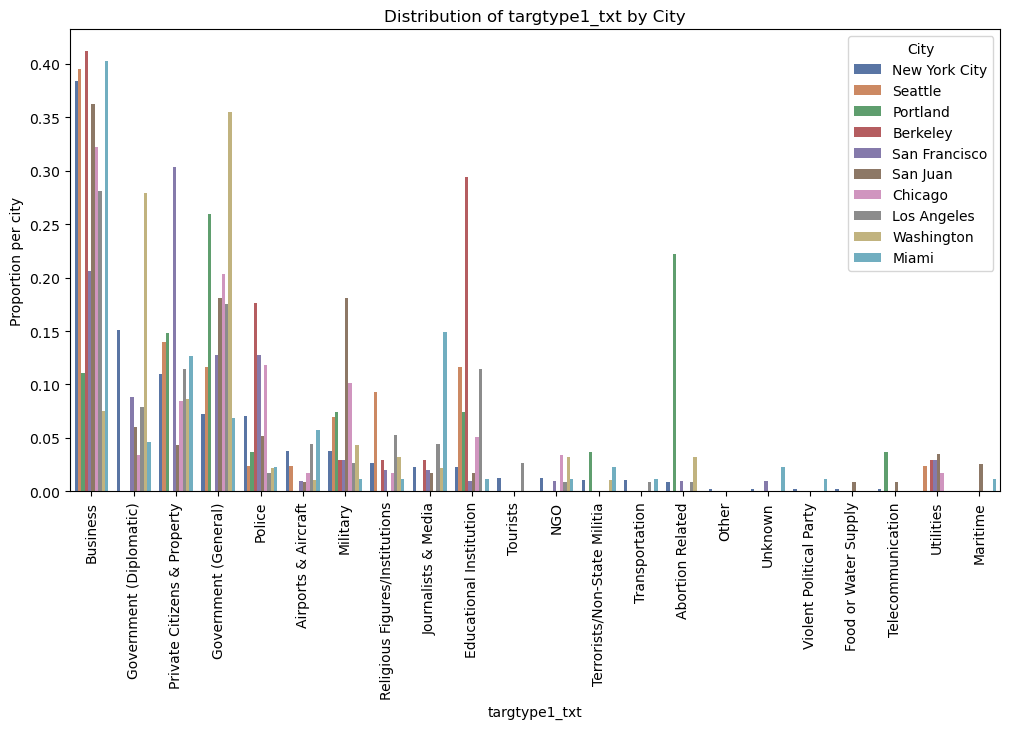

**************************************************
Observed Proportions of weaptype1_txt in each city
**************************************************


New York City   Seattle  \
Explosives                                               0.589212  0.604651   
Incendiary                                               0.207469  0.186047   
Firearms                                                 0.120332  0.139535   
Melee                                                    0.033195  0.000000   
Chemical                                                 0.020747  0.023256   
Biological                                               0.014523  0.000000   
Vehicle (not to include vehicle-borne explosive...       0.006224  0.000000   
Other                                                    0.004149  0.023256   
Unknown                                                  0.002075  0.000000   
Radiological                                             0.002075  0.000000   
Fake Weapons                                             0.000000  0.023256   
Sabotage Equipment                                       0.000000  0.000000   

                                                    Portland  Berkeley  \
Explosives                                          0.370370  0.705882   
Incendiary                                          0.481481  0.205882   
Firearms                                            0.037037  0.029412   
Melee                                               0.037037  0.029412   
Chemical                                            0.000000  0.000000   
Biological                                          0.000000  0.000000   
Vehicle (not to include vehicle-borne explosive...  0.000000  0.000000   
Other                                               0.037037  0.000000   
Unknown                                             0.037037  0.029412   
Radiological                                        0.000000  0.000000   
Fake Weapons                                        0.000000  0.000000   
Sabotage Equipment                                  0.000000  0.000000   

                                                    San Francisco  San Juan  \
Explosives                                               0.558824  0.672414   
Incendiary                                               0.068627  0.103448   
Firearms                                                 0.323529  0.155172   
Melee                                                    0.039216  0.008621   
Chemical                                                 0.000000  0.000000   
Biological                                               0.000000  0.000000   
Vehicle (not to include vehicle-borne explosive...       0.000000  0.000000   
Other                                                    0.000000  0.000000   
Unknown                                                  0.009804  0.060345   
Radiological                                             0.000000  0.000000   
Fake Weapons                                             0.000000  0.000000   
Sabotage Equipment                                       0.000000  0.000000   

                                                     Chicago  Los Angeles  \
Explosives                                          0.728814     0.701754   
Incendiary                                          0.152542     0.192982   
Firearms                                            0.101695     0.052632   
Melee                                               0.016949     0.000000   
Chemical                                            0.000000     0.017544   
Biological                                          0.000000     0.008772   
Vehicle (not to include vehicle-borne explosive...  0.000000     0.017544   
Other                                               0.000000     0.000000   
Unknown                                             0.000000     0.000000   
Radiological                                        0.000000     0.000000   
Fake Weapons                                        0.000000     0.000000   
Sabotage Equipment                                  0.000000     0.008772   

                               

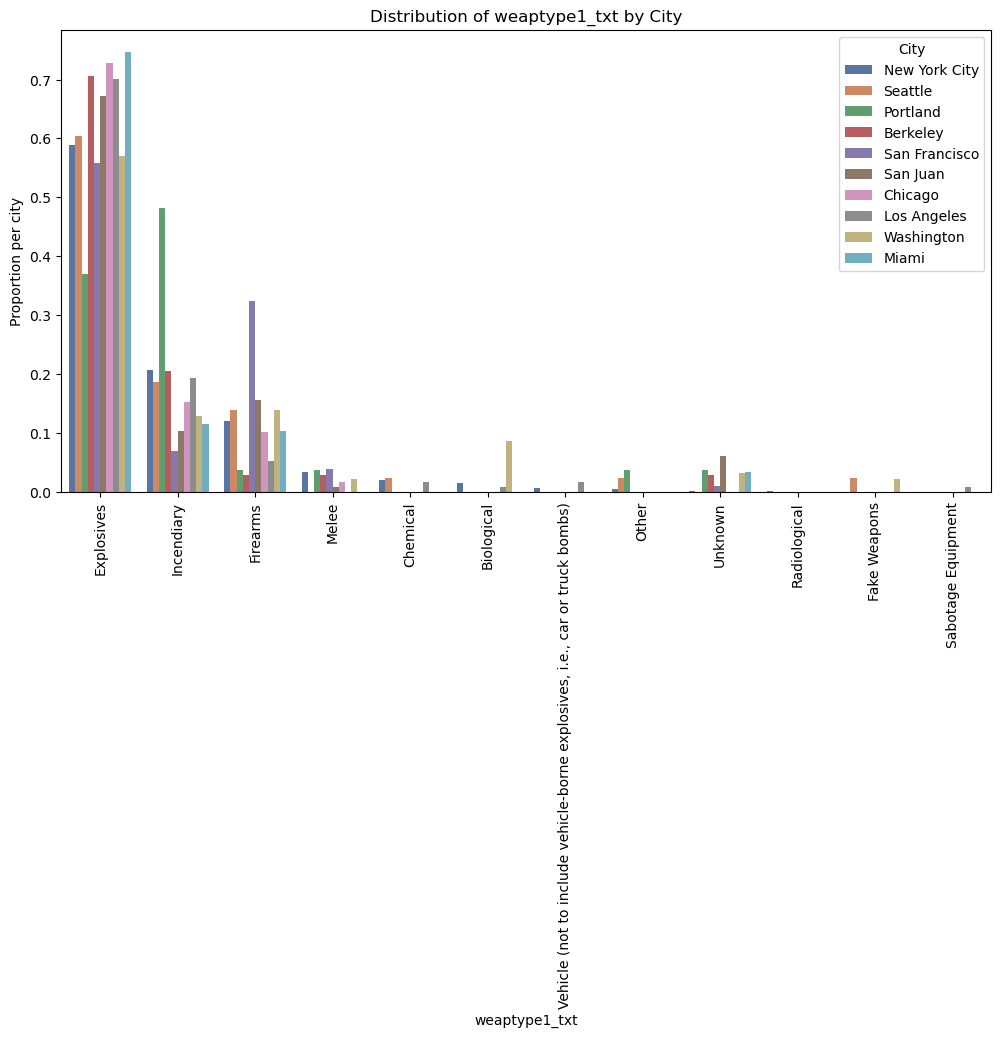

**************************************************
Observed Proportions of propextent in each city
**************************************************


New York City   Seattle  Portland  Berkeley  San Francisco  San Juan  \
0.0       0.560166  0.325581  0.407407  0.441176       0.666667  0.568966   
3.0       0.344398  0.651163  0.518519  0.500000       0.205882  0.258621   
4.0       0.087137  0.000000  0.074074  0.058824       0.127451  0.155172   
2.0       0.004149  0.023256  0.000000  0.000000       0.000000  0.017241   
1.0       0.004149  0.000000  0.000000  0.000000       0.000000  0.000000   

      Chicago  Los Angeles  Washington     Miami  
0.0  0.491525     0.421053    0.569892  0.632184  
3.0  0.322034     0.456140    0.268817  0.229885  
4.0  0.186441     0.114035    0.129032  0.126437  
2.0  0.000000     0.008772    0.032258  0.011494  
1.0  0.000000     0.000000    0.000000  0.000000

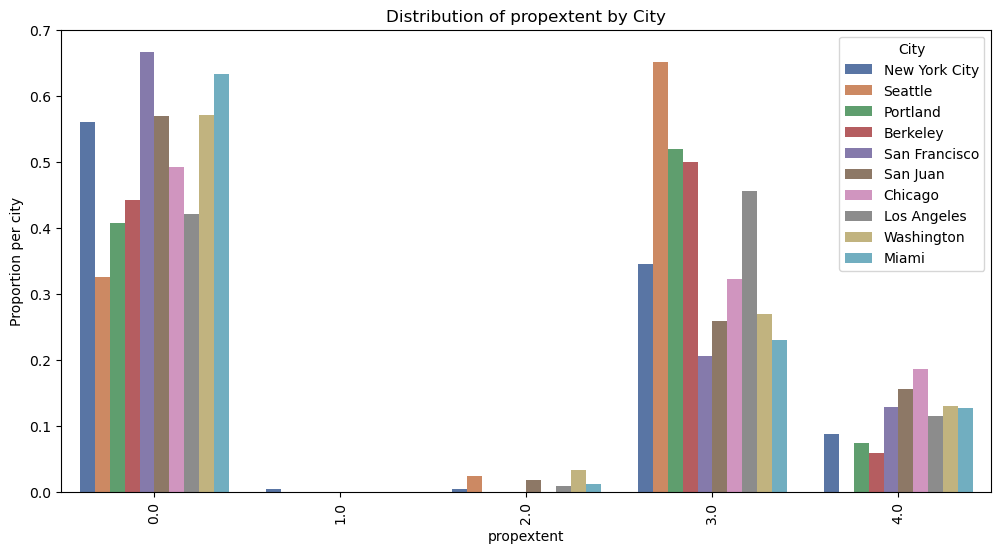

**************************************************
Observed Proportions of success in each city
**************************************************


New York City   Seattle  Portland  Berkeley  San Francisco  San Juan  \
1       0.786307  0.813953  0.814815  0.823529       0.813725   0.87931   
0       0.213693  0.186047  0.185185  0.176471       0.186275   0.12069   

    Chicago  Los Angeles  Washington     Miami  
1  0.779661     0.850877    0.731183  0.896552  
0  0.220339     0.149123    0.268817  0.103448

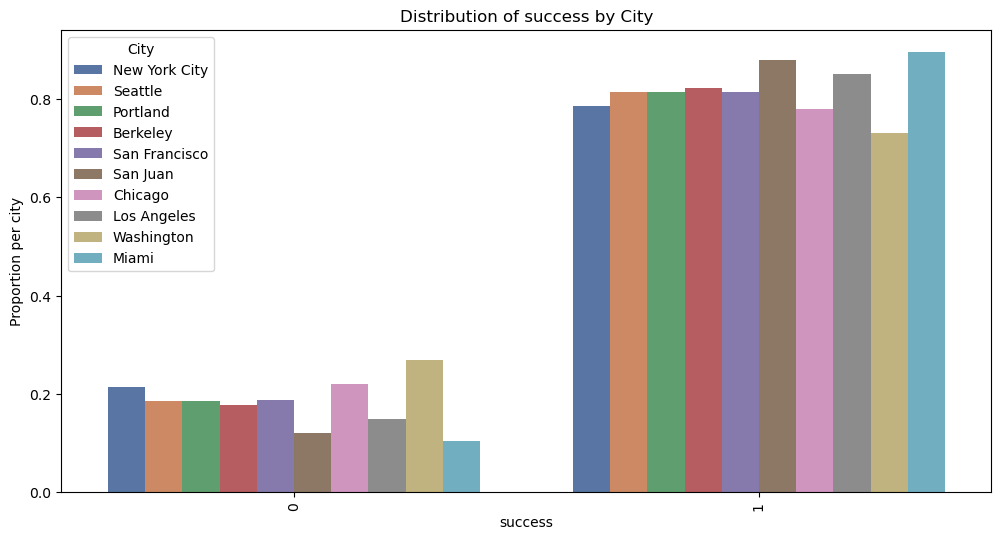

**************************************************
Observed Proportions of nkill in each city
**************************************************


New York City   Seattle  Portland  Berkeley  San Francisco  San Juan  \
0          0.917012  0.906977  0.925926  0.941176       0.784314  0.896552   
1          0.053942  0.069767  0.037037  0.058824       0.205882  0.060345   
2          0.014523  0.023256  0.037037  0.000000       0.009804  0.034483   
4          0.004149  0.000000  0.000000  0.000000       0.000000  0.000000   
8          0.004149  0.000000  0.000000  0.000000       0.000000  0.000000   
1385       0.004149  0.000000  0.000000  0.000000       0.000000  0.000000   
11         0.002075  0.000000  0.000000  0.000000       0.000000  0.000000   
3          0.000000  0.000000  0.000000  0.000000       0.000000  0.008621   
7          0.000000  0.000000  0.000000  0.000000       0.000000  0.000000   

       Chicago  Los Angeles  Washington     Miami  
0     0.966102     0.929825    0.892473  0.896552  
1     0.016949     0.035088    0.043011  0.103448  
2     0.016949     0.017544    0.053763  0.000000  
4     0.000000     0.000000    0.000000  0.000000  
8     0.000000     0.000000    0.000000  0.000000  
1385  0.000000     0.000000    0.000000  0.000000  
11    0.000000     0.000000    0.000000  0.000000  
3     0.000000     0.017544    0.000000  0.000000  
7     0.000000     0.000000    0.010753  0.000000

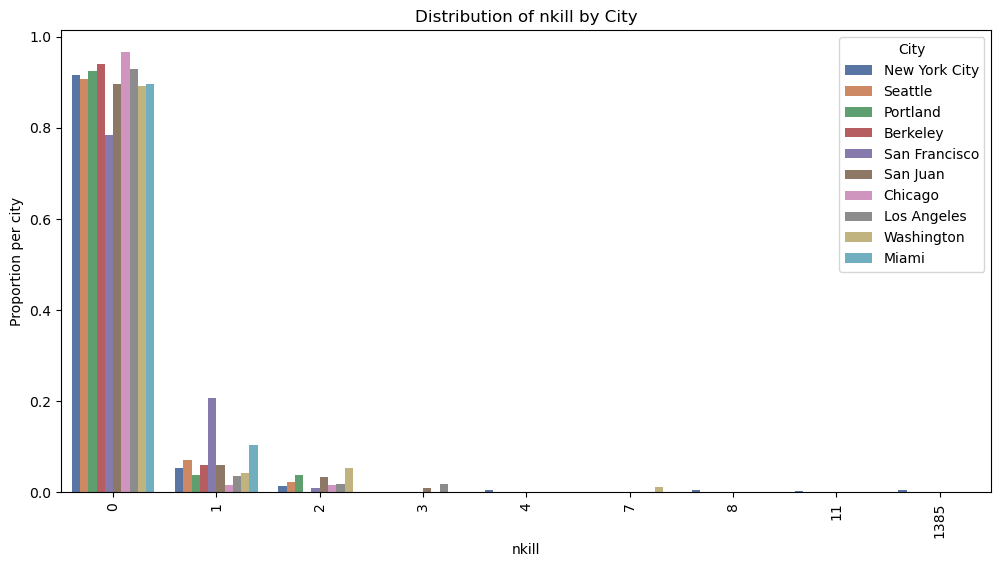

**************************************************
Observed Proportions of nwound in each city
**************************************************


New York City   Seattle  Portland  Berkeley  San Francisco  San Juan  \
0           0.813278  0.930233  0.888889  0.852941       0.833333  0.896552   
1           0.072614  0.046512  0.074074  0.088235       0.147059  0.051724   
2           0.043568  0.000000  0.037037  0.000000       0.019608  0.025862   
3           0.020747  0.000000  0.000000  0.000000       0.000000  0.008621   
4           0.012448  0.000000  0.000000  0.000000       0.000000  0.000000   
10878       0.004149  0.000000  0.000000  0.000000       0.000000  0.000000   
6           0.004149  0.000000  0.000000  0.000000       0.000000  0.000000   
13          0.004149  0.000000  0.000000  0.000000       0.000000  0.000000   
5           0.004149  0.023256  0.000000  0.000000       0.000000  0.000000   
8           0.004149  0.000000  0.000000  0.000000       0.000000  0.008621   
32          0.002075  0.000000  0.000000  0.000000       0.000000  0.000000   
74          0.002075  0.000000  0.000000  0.000000       0.000000  0.000000   
7           0.002075  0.000000  0.000000  0.058824       0.000000  0.000000   
53          0.002075  0.000000  0.000000  0.000000       0.000000  0.000000   
12          0.002075  0.000000  0.000000  0.000000       0.000000  0.000000   
10          0.002075  0.000000  0.000000  0.000000       0.000000  0.000000   
17          0.002075  0.000000  0.000000  0.000000       0.000000  0.000000   
29          0.002075  0.000000  0.000000  0.000000       0.000000  0.000000   
11          0.000000  0.000000  0.000000  0.000000       0.000000  0.008621   
36          0.000000  0.000000  0.000000  0.000000       0.000000  0.000000   
182         0.000000  0.000000  0.000000  0.000000       0.000000  0.000000   

        Chicago  Los Angeles  Washington     Miami  
0      0.847458     0.947368    0.849462  0.965517  
1      0.084746     0.017544    0.086022  0.034483  
2      0.000000     0.000000    0.021505  0.000000  
3      0.033898     0.000000    0.021505  0.000000  
4      0.000000     0.026316    0.000000  0.000000  
10878  0.000000     0.000000    0.000000  0.000000  
6      0.016949     0.000000    0.010753  0.000000  
13     0.000000     0.000000    0.000000  0.000000  
5      0.016949     0.000000    0.000000  0.000000  
8      0.000000     0.000000    0.000000  0.000000  
32     0.000000     0.000000    0.000000  0.000000  
74     0.000000     0.000000    0.000000  0.000000  
7      0.000000     0.000000    0.000000  0.000000  
53     0.000000     0.000000    0.000000  0.000000  
12     0.000000     0.000000    0.000000  0.000000  
10     0.000000     0.000000    0.000000  0.000000  
17     0.000000     0.000000    0.000000  0.000000  
29     0.000000     0.000000    0.000000  0.000000  
11     0.000000     0.000000    0.000000  0.000000  
36     0.000000     0.008772    0.000000  0.000000  
182    0.000000     0.000000    0.010753  0.000000

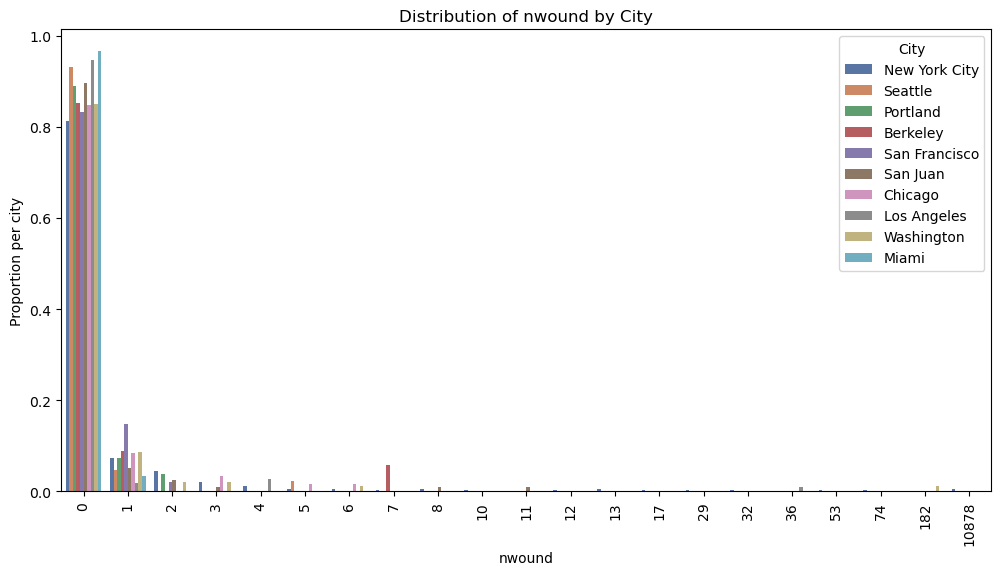

**************************************************
Observed Proportions of nkillter in each city
**************************************************


New York City   Seattle  Portland  Berkeley  San Francisco  San Juan  \
0       0.987552  0.976744       1.0       1.0            1.0  0.991379   
1       0.008299  0.023256       0.0       0.0            0.0  0.000000   
5       0.004149  0.000000       0.0       0.0            0.0  0.000000   
2       0.000000  0.000000       0.0       0.0            0.0  0.008621   

   Chicago  Los Angeles  Washington  Miami  
0      1.0     0.991228    0.967742    1.0  
1      0.0     0.008772    0.032258    0.0  
5      0.0     0.000000    0.000000    0.0  
2      0.0     0.000000    0.000000    0.0

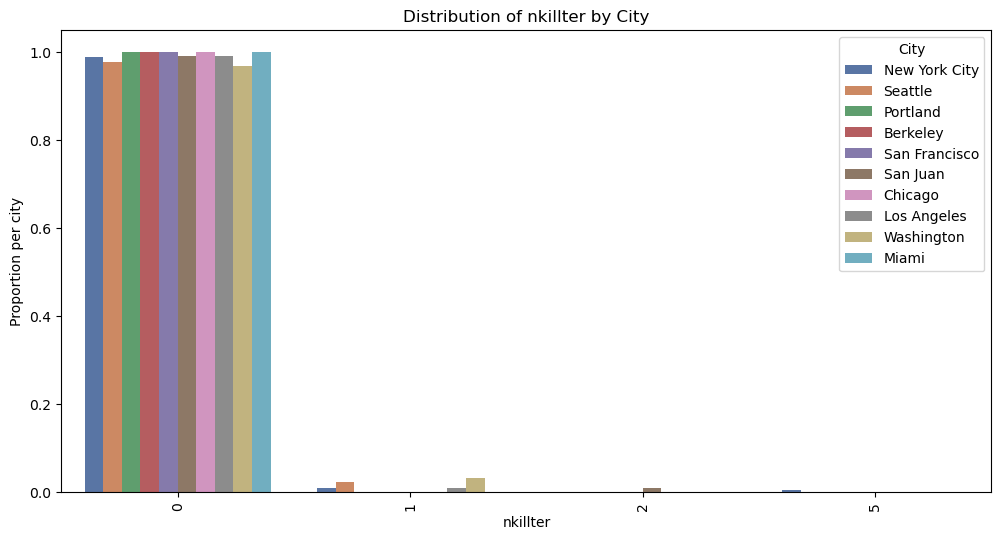

**************************************************
Observed Proportions of nperps in each city
**************************************************


New York City   Seattle  Portland  Berkeley  San Francisco  San Juan  \
 0        0.502075  0.139535  0.074074  0.617647       0.539216  0.612069   
-99       0.259336  0.418605  0.481481  0.264706       0.147059  0.284483   
 1        0.124481  0.232558  0.333333  0.088235       0.176471  0.017241   
 2        0.035270  0.046512  0.037037  0.000000       0.088235  0.043103   
 4        0.029046  0.093023  0.037037  0.000000       0.009804  0.008621   
 3        0.024896  0.023256  0.037037  0.000000       0.039216  0.025862   
 5        0.014523  0.023256  0.000000  0.000000       0.000000  0.000000   
 6        0.004149  0.000000  0.000000  0.000000       0.000000  0.000000   
 10       0.004149  0.000000  0.000000  0.000000       0.000000  0.008621   
 8        0.002075  0.000000  0.000000  0.029412       0.000000  0.000000   
 7        0.000000  0.023256  0.000000  0.000000       0.000000  0.000000   
 24       0.000000  0.000000  0.000000  0.000000       0.000000  0.000000   

      Chicago  Los Angeles  Washington     Miami  
 0   0.406780     0.456140    0.516129  0.609195  
-99  0.288136     0.307018    0.139785  0.229885  
 1   0.169492     0.157895    0.236559  0.034483  
 2   0.050847     0.035088    0.021505  0.057471  
 4   0.050847     0.017544    0.000000  0.000000  
 3   0.033898     0.026316    0.053763  0.034483  
 5   0.000000     0.000000    0.000000  0.022989  
 6   0.000000     0.000000    0.000000  0.011494  
 10  0.000000     0.000000    0.000000  0.000000  
 8   0.000000     0.000000    0.000000  0.000000  
 7   0.000000     0.000000    0.021505  0.000000  
 24  0.000000     0.000000    0.010753  0.000000

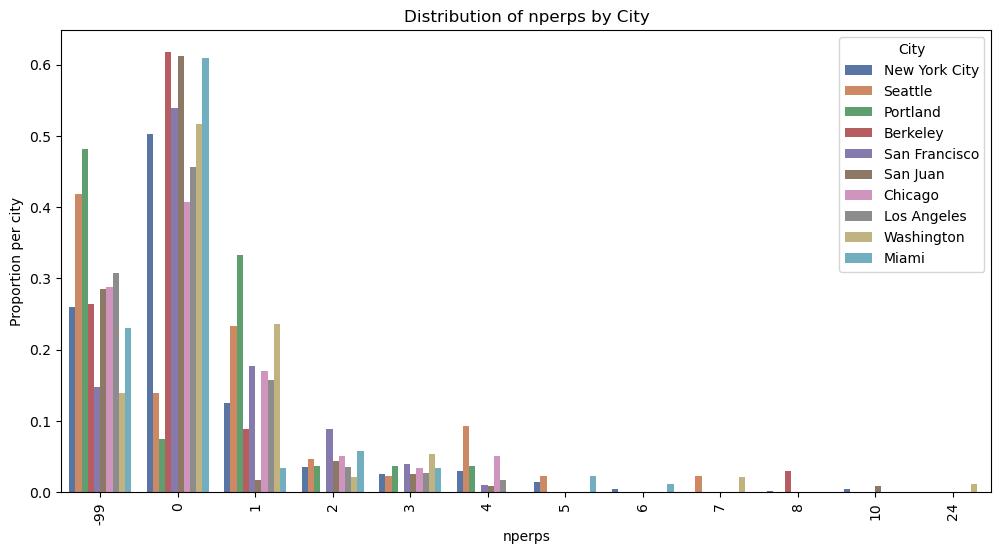

**************************************************
Observed Proportions of nperpcap in each city
**************************************************


New York City   Seattle  Portland  Berkeley  San Francisco  San Juan  \
 0        0.624481  0.255814  0.259259  0.705882       0.607843  0.715517   
-99       0.263485  0.372093  0.333333  0.264706       0.235294  0.284483   
 1        0.087137  0.209302  0.296296  0.029412       0.068627  0.000000   
 4        0.010373  0.116279  0.037037  0.000000       0.000000  0.000000   
 2        0.008299  0.023256  0.037037  0.000000       0.039216  0.000000   
 8        0.002075  0.000000  0.000000  0.000000       0.000000  0.000000   
 5        0.002075  0.023256  0.000000  0.000000       0.000000  0.000000   
 3        0.002075  0.000000  0.037037  0.000000       0.049020  0.000000   
 7        0.000000  0.000000  0.000000  0.000000       0.000000  0.000000   
 6        0.000000  0.000000  0.000000  0.000000       0.000000  0.000000   

      Chicago  Los Angeles  Washington     Miami  
 0   0.576271     0.561404    0.688172  0.689655  
-99  0.288136     0.307018    0.107527  0.241379  
 1   0.084746     0.114035    0.129032  0.022989  
 4   0.016949     0.000000    0.000000  0.000000  
 2   0.033898     0.017544    0.010753  0.011494  
 8   0.000000     0.000000    0.000000  0.000000  
 5   0.000000     0.000000    0.000000  0.011494  
 3   0.000000     0.000000    0.043011  0.011494  
 7   0.000000     0.000000    0.021505  0.000000  
 6   0.000000     0.000000    0.000000  0.011494

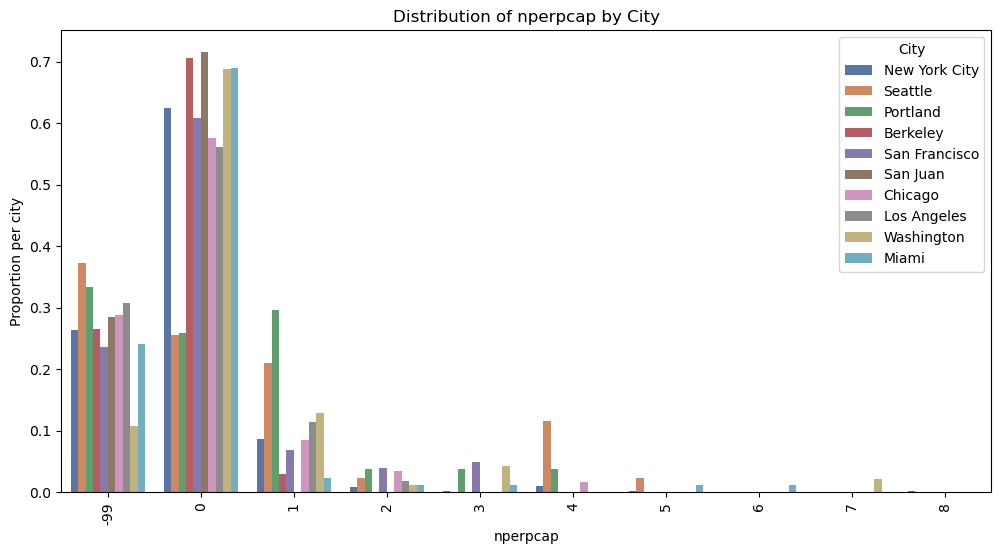

**************************************************
Observed Proportions of nwoundus in each city
**************************************************


New York City   Seattle  Portland  Berkeley  San Francisco  San Juan  \
0         0.887967  0.976744  0.888889  0.970588       0.901961  0.948276   
1         0.049793  0.023256  0.111111  0.000000       0.088235  0.017241   
2         0.029046  0.000000  0.000000  0.000000       0.009804  0.008621   
3         0.018672  0.000000  0.000000  0.000000       0.000000  0.008621   
17        0.002075  0.000000  0.000000  0.000000       0.000000  0.000000   
10        0.002075  0.000000  0.000000  0.000000       0.000000  0.000000   
12        0.002075  0.000000  0.000000  0.000000       0.000000  0.000000   
6         0.002075  0.000000  0.000000  0.000000       0.000000  0.000000   
29        0.002075  0.000000  0.000000  0.000000       0.000000  0.000000   
5         0.002075  0.000000  0.000000  0.000000       0.000000  0.000000   
4         0.002075  0.000000  0.000000  0.000000       0.000000  0.000000   
7         0.000000  0.000000  0.000000  0.029412       0.000000  0.000000   
11        0.000000  0.000000  0.000000  0.000000       0.000000  0.008621   
8         0.000000  0.000000  0.000000  0.000000       0.000000  0.008621   
36        0.000000  0.000000  0.000000  0.000000       0.000000  0.000000   
114       0.000000  0.000000  0.000000  0.000000       0.000000  0.000000   

      Chicago  Los Angeles  Washington     Miami  
0    0.881356     0.973684    0.903226  0.977011  
1    0.067797     0.008772    0.053763  0.022989  
2    0.000000     0.000000    0.010753  0.000000  
3    0.016949     0.000000    0.010753  0.000000  
17   0.000000     0.000000    0.000000  0.000000  
10   0.000000     0.000000    0.000000  0.000000  
12   0.000000     0.000000    0.000000  0.000000  
6    0.016949     0.000000    0.010753  0.000000  
29   0.000000     0.000000    0.000000  0.000000  
5    0.016949     0.000000    0.000000  0.000000  
4    0.000000     0.008772    0.000000  0.000000  
7    0.000000     0.000000    0.000000  0.000000  
11   0.000000     0.000000    0.000000  0.000000  
8    0.000000     0.000000    0.000000  0.000000  
36   0.000000     0.008772    0.000000  0.000000  
114  0.000000     0.000000    0.010753  0.000000

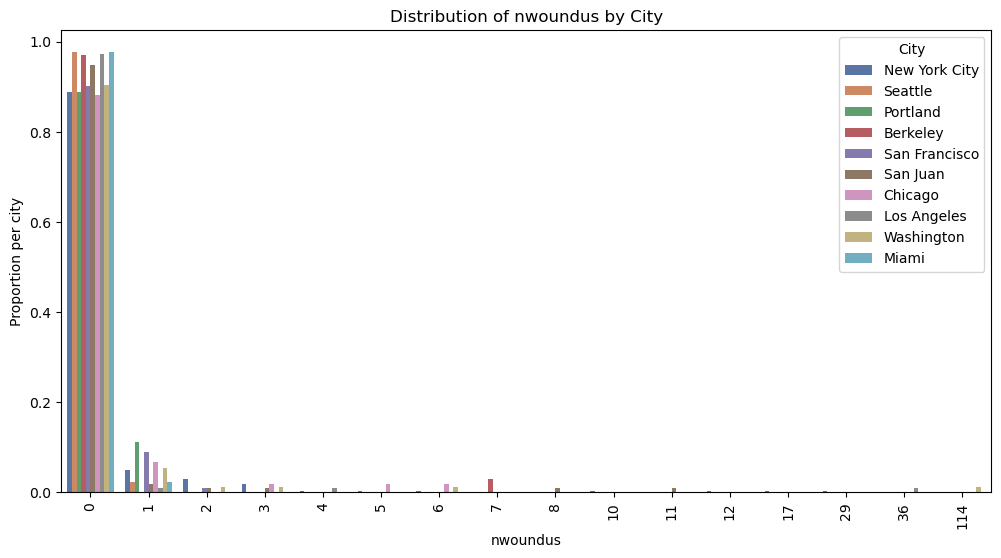

**************************************************
Observed Proportions of nwoundte in each city
**************************************************


New York City   Seattle  Portland  Berkeley  San Francisco  San Juan  \
0        0.989627  0.976744  0.962963       1.0       0.990196       1.0   
1        0.010373  0.023256  0.037037       0.0       0.009804       0.0   
3        0.000000  0.000000  0.000000       0.0       0.000000       0.0   
68       0.000000  0.000000  0.000000       0.0       0.000000       0.0   

     Chicago  Los Angeles  Washington  Miami  
0   0.983051     0.991228    0.978495    1.0  
1   0.000000     0.008772    0.010753    0.0  
3   0.016949     0.000000    0.000000    0.0  
68  0.000000     0.000000    0.010753    0.0

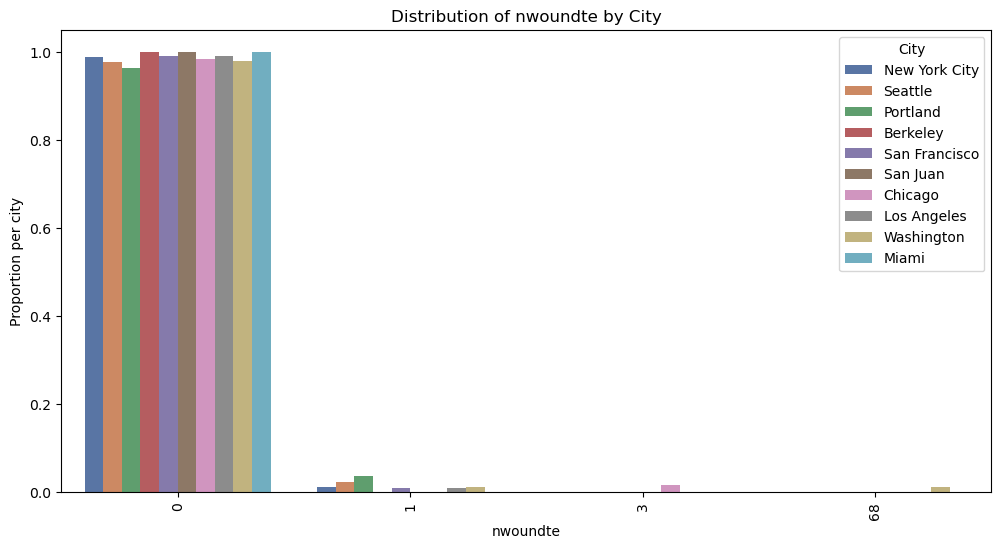

**************************************************
Observed Proportions of INT_LOG in each city
**************************************************


New York City  Seattle  Portland  Berkeley  San Francisco  San Juan  \
-9        0.36722  0.55814  0.740741  0.823529       0.274510  0.250000   
 0        0.33195  0.44186  0.259259  0.176471       0.705882  0.534483   
 1        0.30083  0.00000  0.000000  0.000000       0.019608  0.215517   

     Chicago  Los Angeles  Washington     Miami  
-9  0.355932     0.385965    0.473118  0.356322  
 0  0.169492     0.403509    0.376344  0.160920  
 1  0.474576     0.210526    0.150538  0.482759

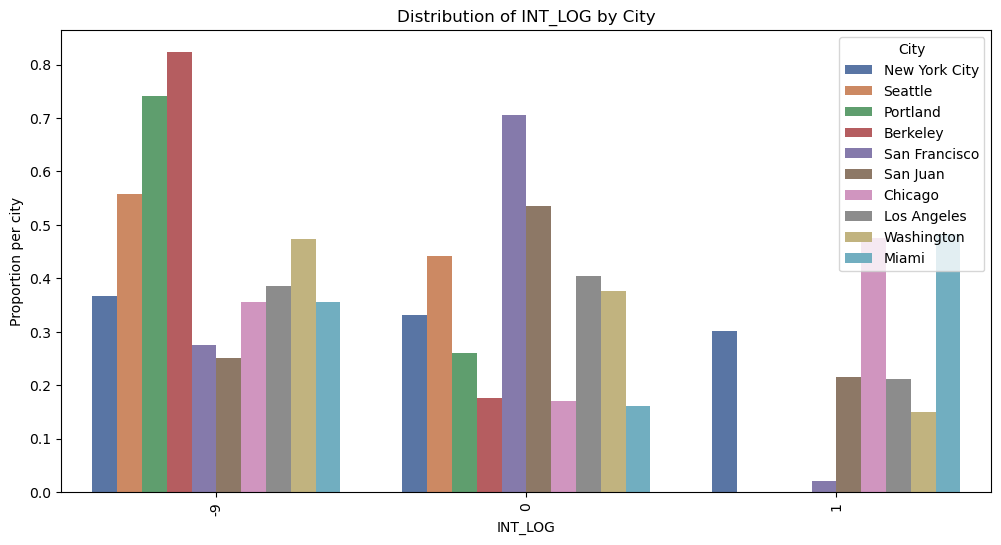

**************************************************
Observed Proportions of INT_IDEO in each city
**************************************************


New York City   Seattle  Portland  Berkeley  San Francisco  San Juan  \
-9       0.367220  0.558140  0.740741  0.823529       0.274510  0.250000   
 0       0.354772  0.302326  0.148148  0.176471       0.647059  0.594828   
 1       0.278008  0.139535  0.111111  0.000000       0.078431  0.155172   

     Chicago  Los Angeles  Washington     Miami  
-9  0.355932     0.385965    0.473118  0.367816  
 0  0.525424     0.307018    0.258065  0.126437  
 1  0.118644     0.307018    0.268817  0.505747

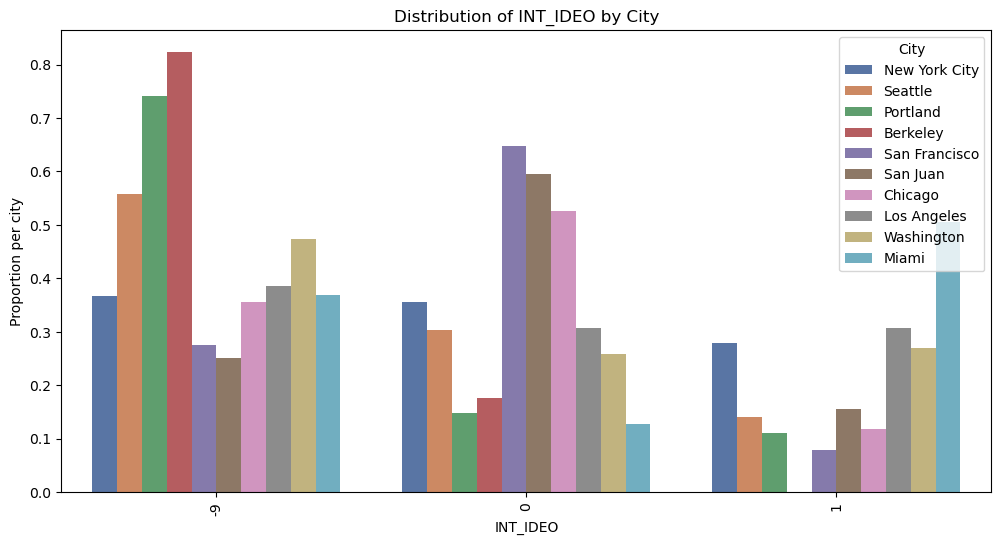

**************************************************
Observed Proportions of INT_MISC in each city
**************************************************


New York City  Seattle  Portland  Berkeley  San Francisco  San Juan  \
 0       0.740664      1.0  0.962963  0.970588       0.882353   0.87069   
 1       0.259336      0.0  0.037037  0.029412       0.117647   0.12931   
-9       0.000000      0.0  0.000000  0.000000       0.000000   0.00000   

     Chicago  Los Angeles  Washington     Miami  
 0  0.949153     0.780702    0.623656  0.655172  
 1  0.050847     0.219298    0.365591  0.310345  
-9  0.000000     0.000000    0.010753  0.034483

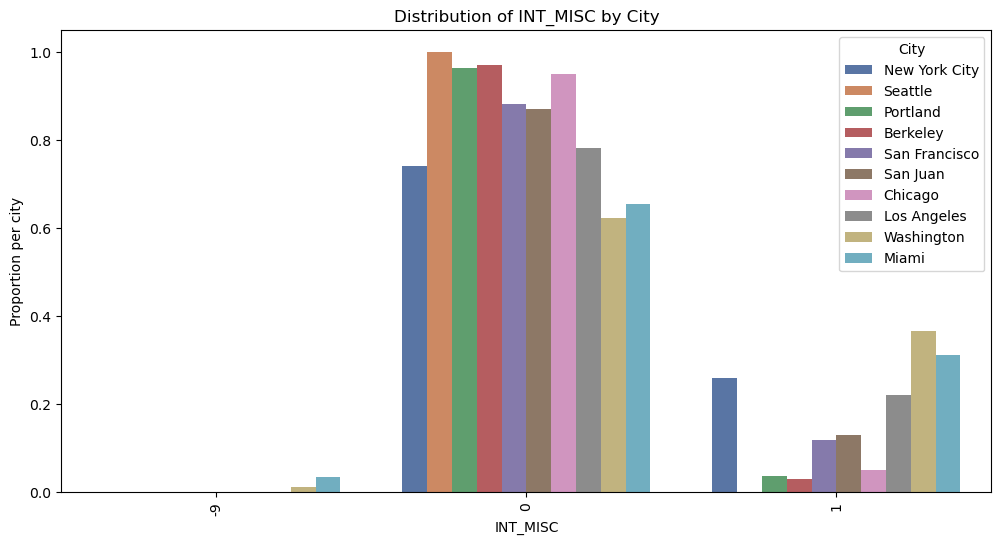

**************************************************
Observed Proportions of INT_ANY in each city
**************************************************


New York City   Seattle  Portland  Berkeley  San Francisco  San Juan  \
 1       0.543568  0.139535  0.111111  0.029412       0.117647  0.301724   
-9       0.298755  0.558140  0.740741  0.794118       0.245098  0.181034   
 0       0.157676  0.302326  0.148148  0.176471       0.637255  0.517241   

     Chicago  Los Angeles  Washington     Miami  
 1  0.508475     0.377193    0.430108  0.666667  
-9  0.355932     0.315789    0.387097  0.275862  
 0  0.135593     0.307018    0.182796  0.057471

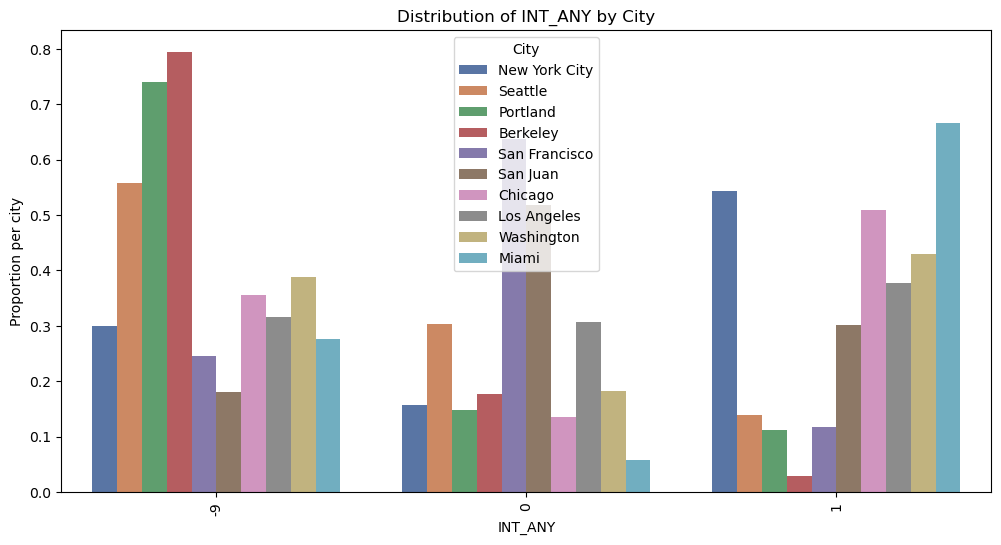

**************************************************
Observed Proportions of corp1 in each city
**************************************************


New York City   Seattle  Portland  \
Unspecified                                   0.460581  0.116279  0.185185   
Not Applicable                                0.041494  0.116279  0.074074   
New York Police Department                    0.031120  0.000000  0.000000   
Unknown                                       0.016598  0.000000  0.111111   
Department Store                              0.012448  0.000000  0.000000   
...                                                ...       ...       ...   
Hotel                                         0.000000  0.000000  0.000000   
Statue/Monument                               0.000000  0.000000  0.000000   
WQBA Spanish Language Radio Station           0.000000  0.000000  0.000000   
Brigade 2506 Association                      0.000000  0.000000  0.000000   
Young Israel of Greater Miami Synagogue       0.000000  0.000000  0.000000   

                                         Berkeley  San Francisco  San Juan  \
Unspecified                              0.294118       0.411765  0.534483   
Not Applicable                           0.000000       0.019608  0.000000   
New York Police Department               0.000000       0.000000  0.000000   
Unknown                                  0.000000       0.000000  0.000000   
Department Store                         0.000000       0.000000  0.008621   
...                                           ...            ...       ...   
Hotel                                    0.000000       0.000000  0.000000   
Statue/Monument                          0.000000       0.000000  0.000000   
WQBA Spanish Language Radio Station      0.000000       0.000000  0.000000   
Brigade 2506 Association                 0.000000       0.000000  0.000000   
Young Israel of Greater Miami Synagogue  0.000000       0.000000  0.000000   

                                          Chicago  Los Angeles  Washington  \
Unspecified                              0.423729     0.359649    0.473118   
Not Applicable                           0.016949     0.008772    0.000000   
New York Police Department               0.000000     0.000000    0.000000   
Unknown                                  0.016949     0.017544    0.000000   
Department Store                         0.000000     0.000000    0.000000   
...                                           ...          ...         ...   
Hotel                                    0.000000     0.000000    0.000000   
Statue/Monument                          0.000000     0.000000    0.000000   
WQBA Spanish Language Radio Station      0.000000     0.000000    0.000000   
Brigade 2506 Association                 0.000000     0.000000    0.000000   
Young Israel of Greater Miami Synagogue  0.000000     0.000000    0.000000   

                                            Miami  
Unspecified                              0.367816  
Not Applicable                           0.000000  
New York Police Department               0.000000  
Unknown                                  0.011494  
Department Store                         0.000000  
...                                           ...  
Hotel                                    0.011494  
Statue/Monument                          0.011494  
WQBA Spanish Language Radio Station      0.011494  
Brigade 2506 Association                 0.011494  
Young Israel of Greater Miami Synagogue  0.011494  

[458 rows x 10 columns]

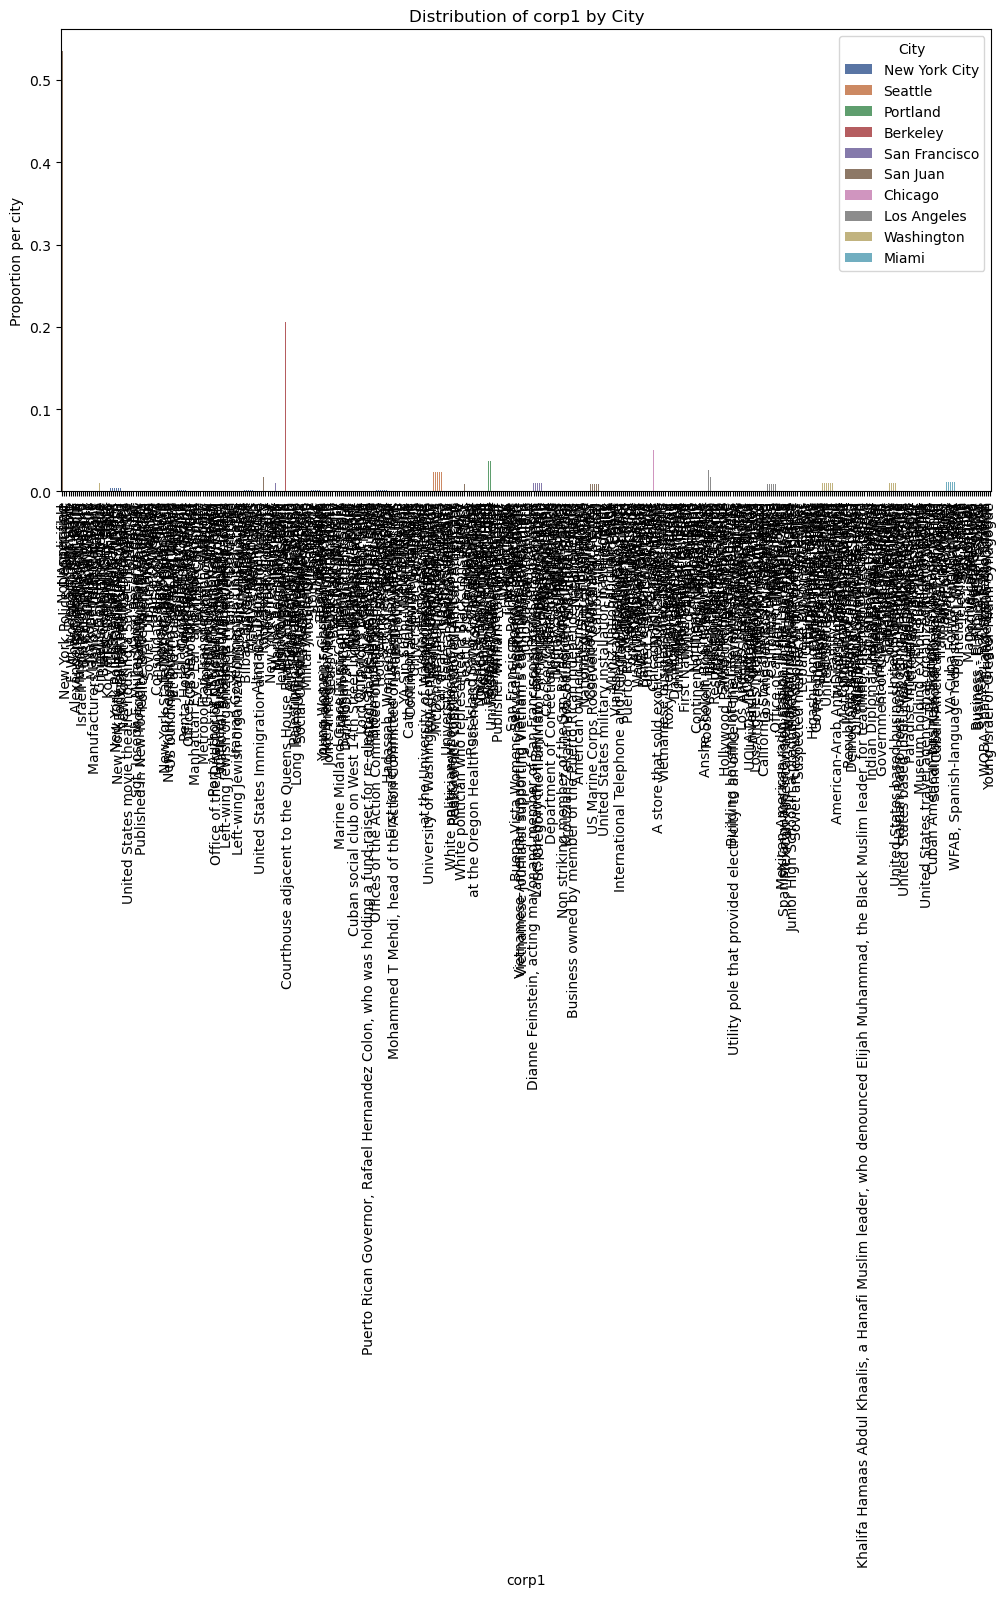

In [15]:
feats_of_int = ['attacktype1_txt','targtype1_txt','weaptype1_txt','propextent','success','nkill','nwound','nkillter','nperps','nperpcap','nwoundus','nwoundte','INT_LOG','INT_IDEO','INT_MISC','INT_ANY','corp1']
for x in feats_of_int :
    proportionhist(x)

### This is very interesting. I see many of the same patterns as before, but the side-by-side view of city proportions helps me understand the extent to which these patterns are present in each city. For instance, the proportion of bombing attacks in Washington is relatively low compared to other cities, even though bombing is the most common type of attack overall. 

### Moreover, the variation of proportion of target types draws a great deal of interest. Chicago displays relatively high proportions for a few target types, whereas Seattle attacks appear more evenly distributed. 

### Four of the seven cities record a majority of incidents that cause more than 1 million USD of property damage.

### Miami has the greatest proportion of successful attacks, and Washington has the least.

### I want to further understand the target types in each city, so I'll dive into the targsubtype1 variable. Ultimately, I'd like to introduce some more information such as city population, counts of certain institutions, etc. 

In [11]:
df.targsubtype1_txt.unique()

array(['School/University/Educational Building', 'Retail/Grocery/Bakery',
       'Military Recruiting Station/Academy',
       'Police Security Forces/Officers',
       'Police Patrol (including vehicles and convoys)',
       'Place of Worship',
       'Politician or Political Party Movement/Meeting/Rally',
       'Multinational Corporation', 'Bank/Commerce',
       'Military Barracks/Base/Headquarters/Checkpost',
       'Police Building (headquarters, station, school)',
       'Named Civilian', 'Government Building/Facility/Office',
       'Gas/Oil/Electric', 'Head of State',
       'Entertainment/Cultural/Stadium/Casino', 'Restaurant/Bar/Café',
       'Government Personnel (excluding police, military)',
       'Public Area (garden, parking lot, garage, beach, public building, camp)',
       'International NGO', 'Political Party Member/Rally', '0',
       'Diplomatic Personnel (outside of embassy, consulate)',
       'Domestic NGO', 'Radio', 'Terrorist', 'Construction',
       'Fire F

In [29]:
df.targsubtype1_txt.describe()

count        3147
unique         87
top       Clinics
freq          243
Name: targsubtype1_txt, dtype: object

In [30]:
df.targsubtype1_txt.value_counts()

targsubtype1_txt
Clinics                                243
Bank/Commerce                          223
Retail/Grocery/Bakery                  205
Government Building/Facility/Office    204
Place of Worship                       199
                                      ... 
Other Facility                           2
Village/City/Town/Suburb                 2
Fire Fighter/Truck                       2
Civilian Maritime                        1
Non-combatant Personnel                  1
Name: count, Length: 87, dtype: int64

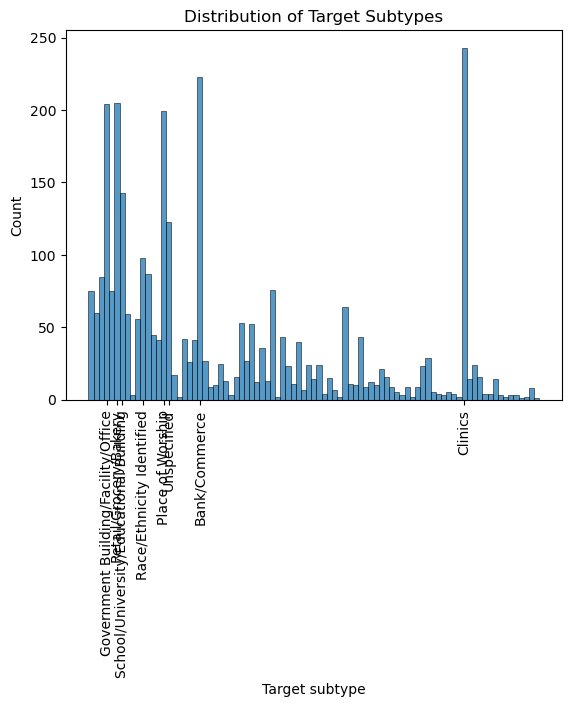

In [31]:
fig, ax = plt.subplots()
sns.histplot(x='targsubtype1_txt', data=df)
ax.set_title('Distribution of Target Subtypes')
ax.set_xlabel('Target subtype')
ax.tick_params(axis='x', rotation=90)
      
max_ticks = 8  
values = df['targsubtype1_txt'].value_counts().index[:max_ticks]  
ax.set_xticks(values)
ax.set_xticklabels(values) 
plt.show()

### It looks like the most common target subtypes over all are retail/grocery/bakery, place of worship, bank/commerce, government building, entertainment, diplomatic personnel, and embassy consulate. There is also a fair amount of unspecified subtypes. 

### To better understand the distribution of subtypes, I'll visualize the relative proportions of each subtype in each city. Since there are 78 unique categories, I'll set a threshold to visualize only those that occur more than 20 times.

In [36]:
def proportionhistlite(feature, threshold=20) :
    print("*" * 50)
    print(f"Observed Proportions of {feature} in each city for categories above {threshold} incidents")
    print("*" * 50)
    probdf = pd.DataFrame()
    citylist = [x for x in df_city_25.city.unique()]
    vc = df_city_25[feature].value_counts()
    var_of_int = vc[vc >= threshold].index.tolist()
    dflite = df_city_25[df_city_25[feature].isin(var_of_int)]
    for city in citylist:
        counts = dflite[dflite.city == city][feature].value_counts()
        ind = [i for i in counts.index]
        proportion = [x/counts.sum() for x in counts]
        myd = dict(zip(ind,proportion))
        newdf = pd.DataFrame.from_dict(myd,orient='index')
        newdf.rename(columns = {0:city}, inplace=True)
        probdf = pd.concat([probdf, newdf], axis=1)
    probdf.fillna(0, inplace=True)
    display(probdf)
    
    problite_long = probdf.reset_index().melt(id_vars='index', var_name='City', value_name='Proportion')
    
    # Create the histogram using seaborn
    plt.figure(figsize=(12, 6))
    sns.barplot(data=problite_long, x='index', y='Proportion', hue='City', palette='deep')
    plt.xlabel(feature)
    plt.ylabel('Proportion per city')
    plt.title(f"Observed Proportions of {feature} in each city for categories above {threshold} incidents")
    plt.xticks(rotation=90)
    plt.legend(title='City')
    plt.show()

**************************************************
Observed Proportions of targsubtype1_txt in each city for categories above 20 incidents
**************************************************


New York City   Seattle  \
Retail/Grocery/Bakery                                    0.201780  0.200000   
Bank/Commerce                                            0.186944  0.033333   
Unspecified                                              0.077151  0.133333   
Entertainment/Cultural/Stadium/Casino                    0.059347  0.033333   
Embassy/Consulate                                        0.059347  0.000000   
Government Building/Facility/Office                      0.041543  0.100000   
Police Security Forces/Officers                          0.041543  0.000000   
Diplomatic Personnel (outside of embassy, consu...       0.041543  0.000000   
Multinational Corporation                                0.038576  0.033333   
Newspaper Journalist/Staff/Facility                      0.032641  0.000000   
Place of Worship                                         0.032641  0.133333   
School/University/Educational Building                   0.032641  0.100000   
Police Patrol (including vehicles and convoys)           0.029674  0.000000   
Military Recruiting Station/Academy                      0.026706  0.066667   
Politician or Political Party Movement/Meeting/...       0.026706  0.066667   
Police Building (headquarters, station, school)          0.026706  0.033333   
Military Barracks/Base/Headquarters/Checkpost            0.023739  0.033333   
Race/Ethnicity Identified                                0.020772  0.033333   

                                                    Portland  Berkeley  \
Retail/Grocery/Bakery                               0.000000  0.172414   
Bank/Commerce                                       0.083333  0.241379   
Unspecified                                         0.000000  0.000000   
Entertainment/Cultural/Stadium/Casino               0.000000  0.000000   
Embassy/Consulate                                   0.000000  0.000000   
Government Building/Facility/Office                 0.583333  0.000000   
Police Security Forces/Officers                     0.000000  0.034483   
Diplomatic Personnel (outside of embassy, consu...  0.000000  0.000000   
Multinational Corporation                           0.000000  0.000000   
Newspaper Journalist/Staff/Facility                 0.000000  0.034483   
Place of Worship                                    0.000000  0.034483   
School/University/Educational Building              0.083333  0.275862   
Police Patrol (including vehicles and convoys)      0.000000  0.068966   
Military Recruiting Station/Academy                 0.166667  0.034483   
Politician or Political Party Movement/Meeting/...  0.000000  0.000000   
Police Building (headquarters, station, school)     0.083333  0.103448   
Military Barracks/Base/Headquarters/Checkpost       0.000000  0.000000   
Race/Ethnicity Identified                           0.000000  0.000000   

                                                    San Francisco  San Juan  \
Retail/Grocery/Bakery                                    0.039474  0.162162   
Bank/Commerce                                            0.131579  0.108108   
Unspecified                                              0.092105  0.054054   
Entertainment/Cultural/Stadium/Casino                    0.000000  0.081081   
Embassy/Consulate                                        0.065789  0.094595   
Government Building/Facility/Office                      0.078947  0.202703   
Police Security Forces/Officers                          0.078947  0.040541   
Diplomatic Personnel (outside of embassy, consu...       0.052632  0.000000   
Multinational Corporation                                0.013158  0.027027   
Newspaper Journalist/Staff/Facility                      0.013158  0.027027   
Place of Worship                                         0.013158  0.000000   
School/University/Educational Building                   0.013158  0.027027   
Police Patrol (including vehicles and convoys)           0.026316  0.013514   
Military Recruiting Station/Academy  

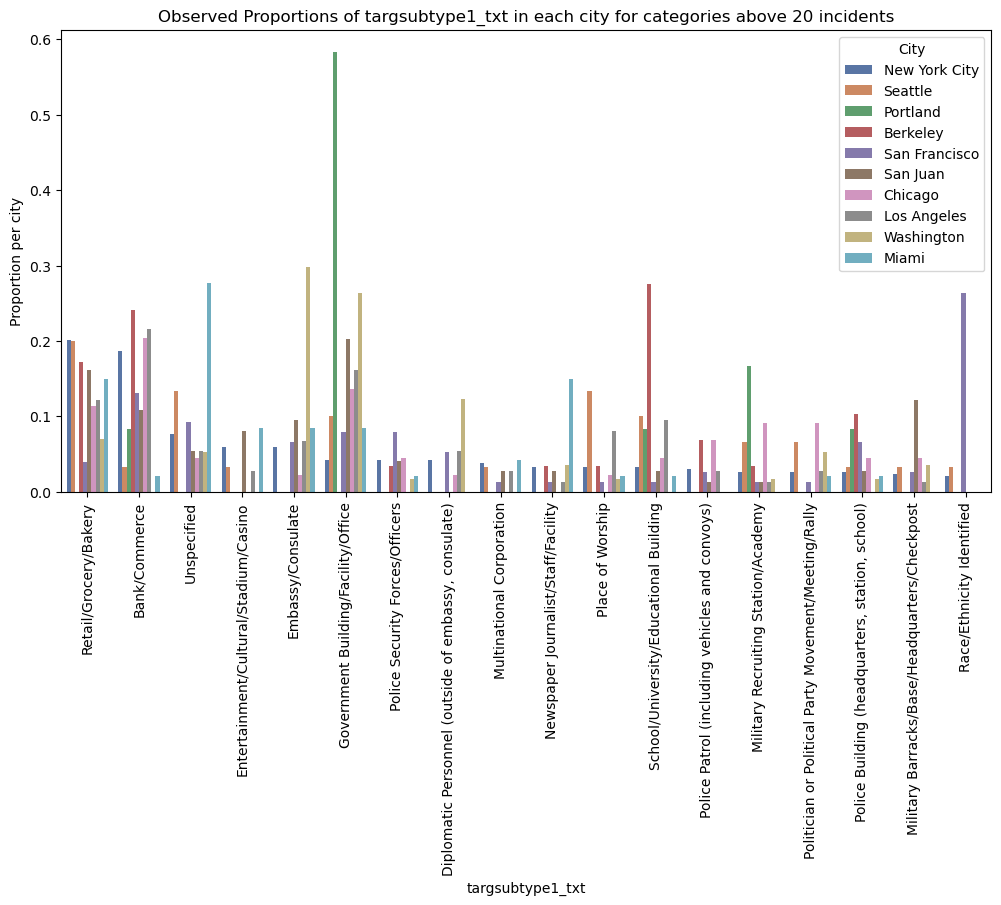

In [37]:
proportionhistlite('targsubtype1_txt',threshold = 20)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   eventid           900 non-null    int64  
 1   date              900 non-null    object 
 2   extended          900 non-null    int64  
 3   city              900 non-null    object 
 4   latitude          900 non-null    float64
 5   longitude         900 non-null    float64
 6   specificity       900 non-null    float64
 7   vicinity          900 non-null    int64  
 8   crit1             900 non-null    int64  
 9   crit2             900 non-null    int64  
 10  crit3             900 non-null    int64  
 11  success           900 non-null    int64  
 12  suicide           900 non-null    int64  
 13  attacktype1_txt   900 non-null    object 
 14  targtype1_txt     900 non-null    object 
 15  targsubtype1_txt  900 non-null    object 
 16  target1           900 non-null    object 
 1

In [18]:
df.weapsubtype1_txt.unique()

array(['Pipe Bomb', 'Molotov Cocktail/Petrol Bomb',
       'Unknown Explosive Type', 'Unknown Gun Type',
       'Gasoline or Alcohol', 'Dynamite/TNT', 'Time Fuse',
       'Projectile (rockets, mortars, RPGs, etc.)', 'Letter Bomb',
       'Other Explosive Type', 'Arson/Fire', 'Handgun', 'Blunt Object',
       '0', 'Rifle/Shotgun (non-automatic)',
       'Knife or Other Sharp Object', 'Automatic or Semi-Automatic Rifle',
       'Vehicle', 'Grenade', 'Explosive', 'Poisoning',
       'Hands, Feet, Fists', 'Remote Trigger', 'Other Gun Type',
       'Suicide (carried bodily by human being)'], dtype=object)

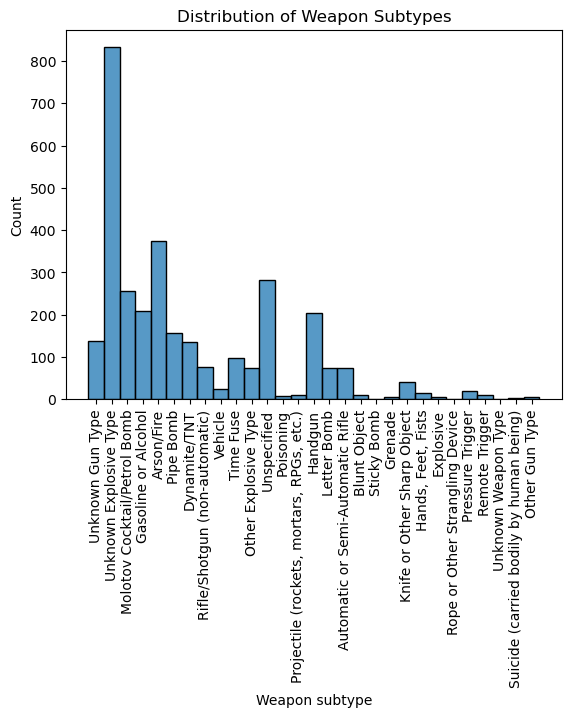

In [38]:
fig, ax = plt.subplots()
sns.histplot(x='weapsubtype1_txt', data=df)
ax.set_title('Distribution of Weapon Subtypes')
ax.set_xlabel('Weapon subtype')
ax.tick_params(axis='x', rotation=90)
      


**************************************************
Observed Proportions of weapsubtype1_txt in each city for categories above 20 incidents
**************************************************


New York City   Seattle  Portland  \
Unknown Explosive Type                  0.367946  0.372093  0.153846   
Unspecified                             0.137698  0.069767  0.115385   
Pipe Bomb                               0.083521  0.023256  0.076923   
Handgun                                 0.074492  0.069767  0.038462   
Time Fuse                               0.056433  0.023256  0.000000   
Molotov Cocktail/Petrol Bomb            0.051919  0.023256  0.192308   
Gasoline or Alcohol                     0.049661  0.069767  0.153846   
Dynamite/TNT                            0.042889  0.162791  0.038462   
Arson/Fire                              0.040632  0.093023  0.115385   
Other Explosive Type                    0.031603  0.023256  0.000000   
Letter Bomb                             0.027088  0.000000  0.115385   
Unknown Gun Type                        0.022573  0.069767  0.000000   
Automatic or Semi-Automatic Rifle       0.013544  0.000000  0.000000   

                                   Berkeley  San Francisco  San Juan  \
Unknown Explosive Type              0.56250       0.505155  0.600000   
Unspecified                         0.15625       0.051546  0.136364   
Pipe Bomb                           0.06250       0.020619  0.027273   
Handgun                             0.03125       0.268041  0.045455   
Time Fuse                           0.06250       0.051546  0.027273   
Molotov Cocktail/Petrol Bomb        0.03125       0.010309  0.036364   
Gasoline or Alcohol                 0.03125       0.000000  0.000000   
Dynamite/TNT                        0.03125       0.010309  0.027273   
Arson/Fire                          0.03125       0.020619  0.000000   
Other Explosive Type                0.00000       0.000000  0.009091   
Letter Bomb                         0.00000       0.000000  0.000000   
Unknown Gun Type                    0.00000       0.030928  0.045455   
Automatic or Semi-Automatic Rifle   0.00000       0.030928  0.045455   

                                    Chicago  Los Angeles  Washington   Miami  
Unknown Explosive Type             0.396226     0.555556    0.382022  0.5125  
Unspecified                        0.018868     0.083333    0.191011  0.0875  
Pipe Bomb                          0.037736     0.055556    0.022472  0.1500  
Handgun                            0.037736     0.018519    0.067416  0.0500  
Time Fuse                          0.132075     0.027778    0.044944  0.0000  
Molotov Cocktail/Petrol Bomb       0.075472     0.027778    0.022472  0.0500  
Gasoline or Alcohol                0.018868     0.027778    0.033708  0.0125  
Dynamite/TNT                       0.132075     0.018519    0.011236  0.0750  
Arson/Fire                         0.056604     0.101852    0.033708  0.0125  
Other Explosive Type               0.037736     0.037037    0.022472  0.0000  
Letter Bomb                        0.056604     0.009259    0.112360  0.0125  
Unknown Gun Type                   0.000000     0.009259    0.022472  0.0375  
Automatic or Semi-Automatic Rifle  0.000000     0.027778    0.033708  0.0000

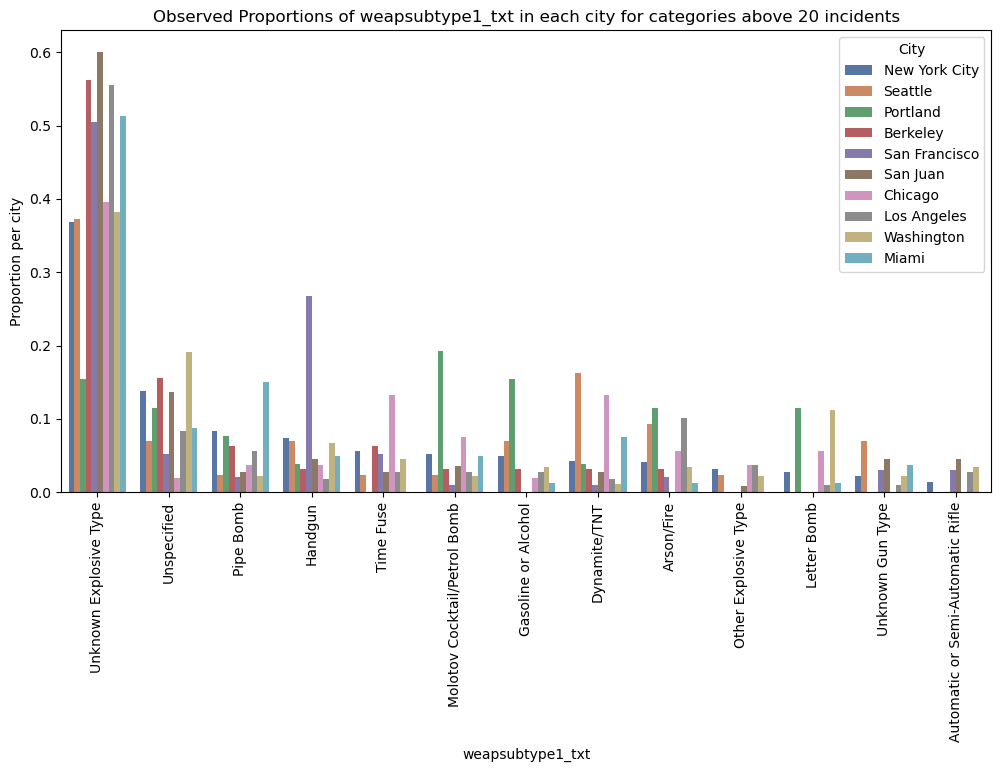

In [39]:
proportionhistlite('weapsubtype1_txt', threshold = 20)

### Time to work with the time-series data.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   eventid           900 non-null    int64  
 1   date              900 non-null    object 
 2   extended          900 non-null    int64  
 3   city              900 non-null    object 
 4   latitude          900 non-null    float64
 5   longitude         900 non-null    float64
 6   specificity       900 non-null    float64
 7   vicinity          900 non-null    int64  
 8   crit1             900 non-null    int64  
 9   crit2             900 non-null    int64  
 10  crit3             900 non-null    int64  
 11  success           900 non-null    int64  
 12  suicide           900 non-null    int64  
 13  attacktype1_txt   900 non-null    object 
 14  targtype1_txt     900 non-null    object 
 15  targsubtype1_txt  900 non-null    object 
 16  target1           900 non-null    object 
 1

In [40]:
df.date = pd.to_datetime(df.date)
df.date

0      1970-01-01
1      1970-01-02
2      1970-01-02
3      1970-01-03
4      1970-01-01
          ...    
3142   2021-05-22
3143   2021-05-23
3144   2021-05-24
3145   2021-06-21
3146   2021-06-26
Name: date, Length: 3147, dtype: datetime64[ns]

In [41]:
df.date[0].year

1970

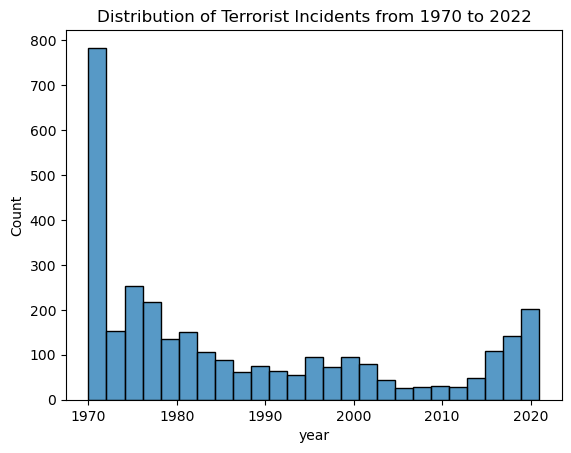

In [42]:
year_list = []
for d in df.date :
    year_list.append(d.year)
years = pd.Series(year_list)
sns.histplot(years, bins=25)
plt.xlabel('year')
plt.title('Distribution of Terrorist Incidents from 1970 to 2022')
plt.show();

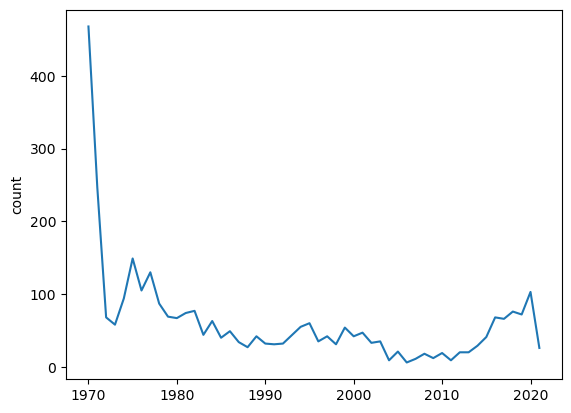

In [43]:
year_counts = years.value_counts()
sns.lineplot(year_counts)
plt.show();

In [49]:
df_city_25['year'] = years

C:\Users\casti\AppData\Local\Temp\ipykernel_10384\1025915461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_25['year'] = years


In [50]:
def city_df() :
    df_city_counts = pd.DataFrame()
    for c in df_city_25.city.unique() :
        df_city = df_city_25[df_city_25['city'] == f'{c}']
        city_year_counts = df_city.year.value_counts()
        count_dict = dict(city_year_counts)
        df_count = pd.DataFrame.from_dict(count_dict,orient='index')
        df_count.rename(columns={0:f'{c}'},inplace=True)
        df_city_counts[f'{c}'] = city_year_counts
        df_city_counts.fillna(0, inplace=True)
    display(df_city_counts.head())
    
    sns.lineplot(data=df_city_counts, dashes = False, alpha = 0.6)
    plt.ylabel('count')
    plt.title('Number of Incidents from 1970 to 2022')
    plt.show()
    sns.lineplot(data=df_city_counts.iloc[:, 1:], dashes = False, alpha = 0.6)
    plt.title('Number of Incidents from 1970 to 2022 w/o NYC')
    plt.ylabel('count')
    plt.show()

New York City  Seattle  Portland  Berkeley  San Francisco  San Juan  \
year                                                                        
1970             82     18.0       7.0      17.0           11.0       8.0   
1976             43      0.0       0.0       0.0           13.0       1.0   
1977             40      3.0       0.0       0.0           14.0       5.0   
1971             38      0.0       2.0       5.0           13.0       6.0   
1972             30      1.0       0.0       0.0            2.0       3.0   

      Chicago  Los Angeles  Washington  Miami  
year                                           
1970     10.0         13.0        12.0    2.0  
1976      6.0          0.0         5.0    4.0  
1977      5.0          2.0         6.0    7.0  
1971      1.0         30.0         2.0    1.0  
1972      3.0          3.0         2.0    3.0

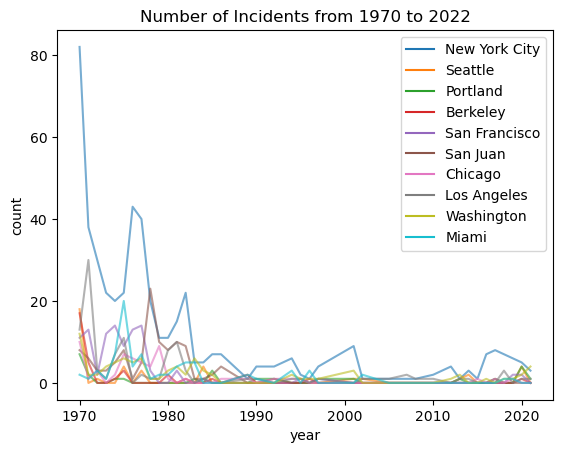

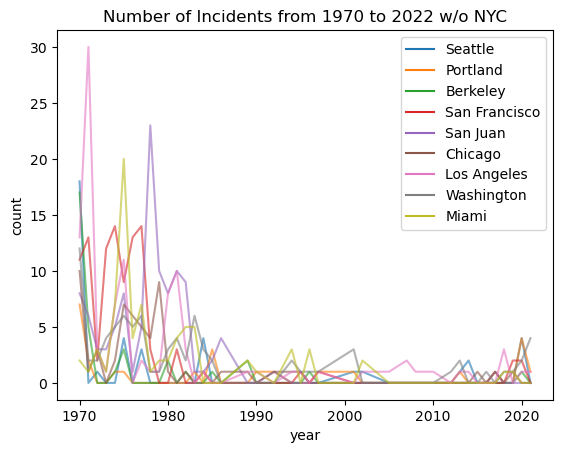

In [51]:
city_df()

In [53]:
def city_plot_by_feat(df, feature):
    '''Create a series of line plots that each display one value of the chosen feature over time.'''

    num_values = len(df[feature].unique())
    num_cols = min(len(df['city'].unique()), 3)  
    num_rows = -(-num_values // num_cols)  
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
    axes = axes.flatten()
    
    x_min = 1970
    x_max = 2022
    
    for i, value in enumerate(df[feature].unique()):
        df_value = df[df[feature] == value]
               
        for city in df['city'].unique():
            df_city = df_value[df_value['city'] == city]
            value_counts = df_city.groupby('year').size()
            sns.lineplot(x=value_counts.index, y=value_counts.values, ax=axes[i], label=city, alpha = 0.6)
        
        axes[i].set_xlim(x_min, x_max)
        axes[i].set_title(f'{value}')
        axes[i].set_xlabel('Year')
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x')
        axes[i].legend()

    for j in range(num_values, num_rows*num_cols):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

**************************************************
Analysis of values in targtype1_txt over time
**************************************************


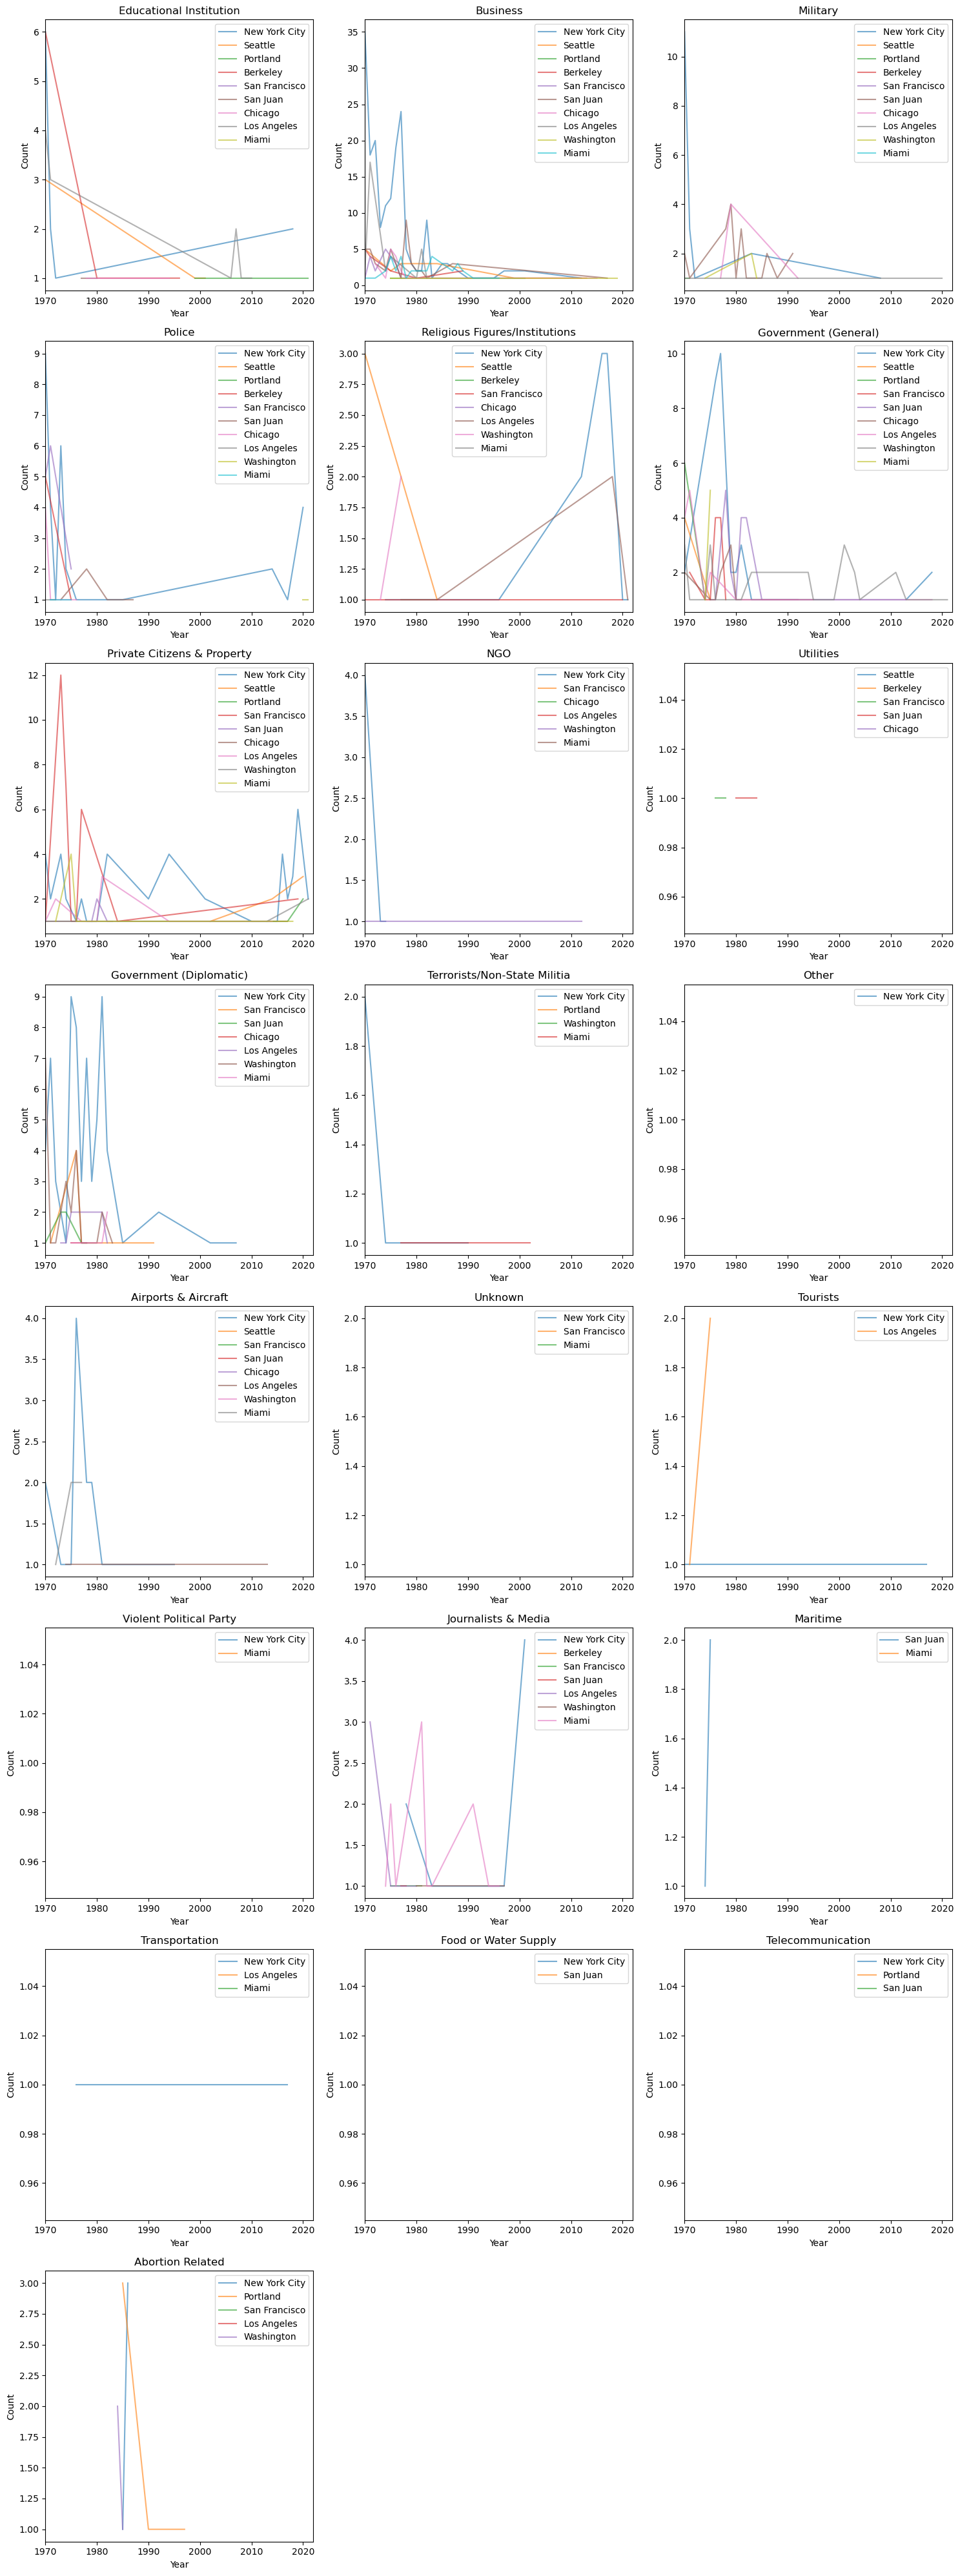

**************************************************
Analysis of values in targsubtype1_txt over time
**************************************************


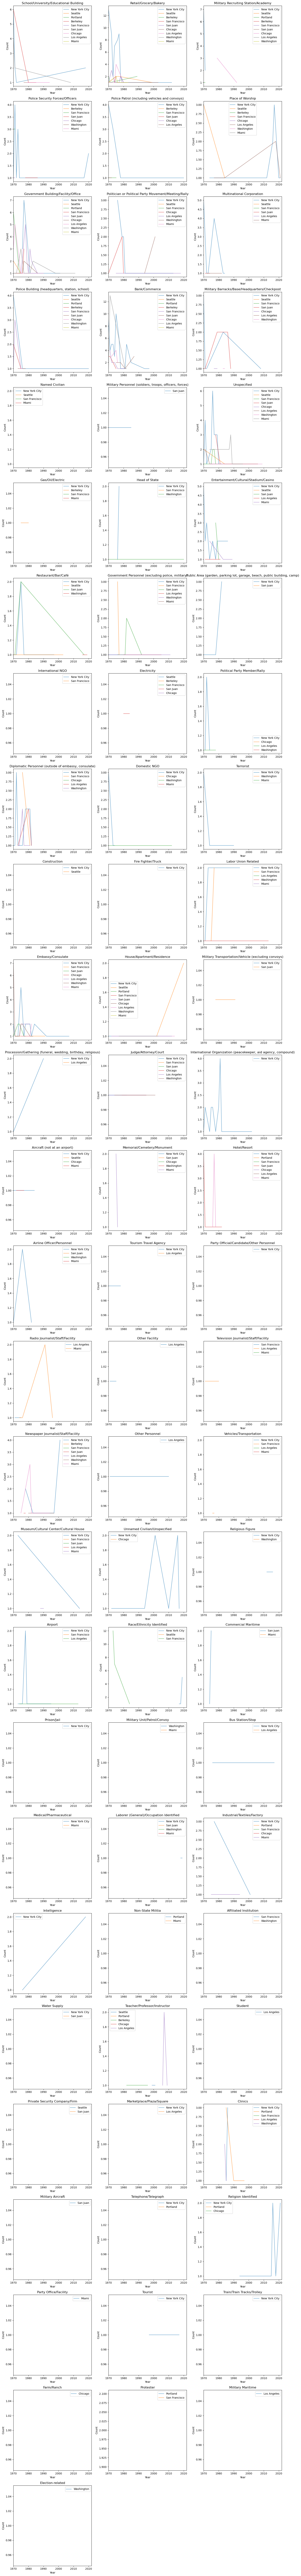

**************************************************
Analysis of values in weaptype1_txt over time
**************************************************


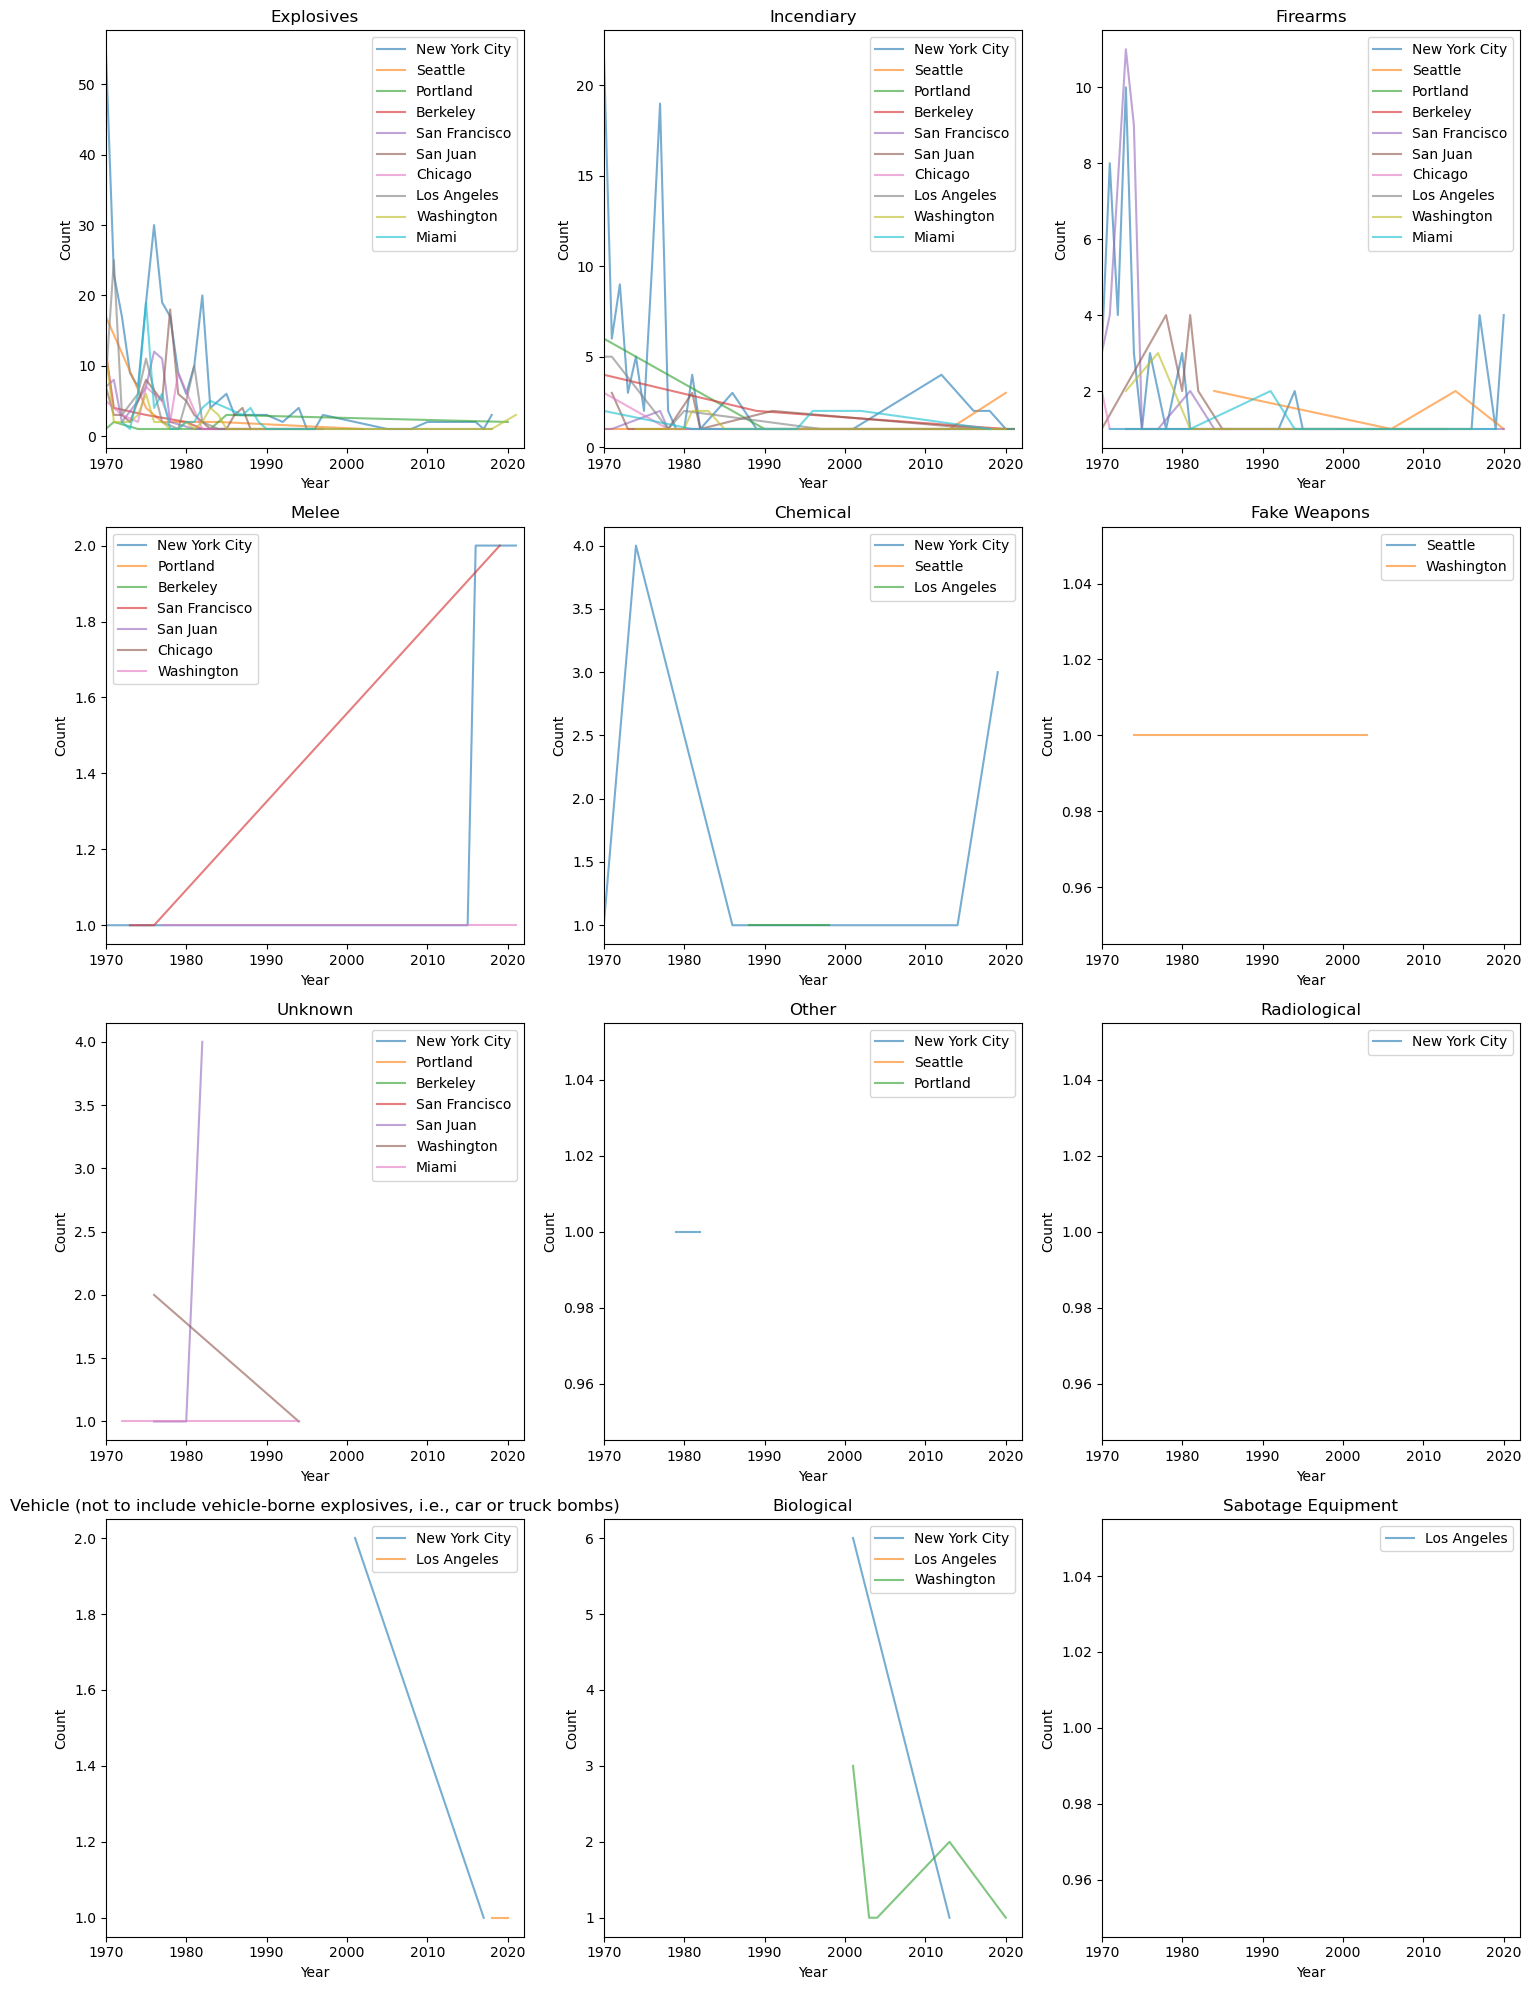

**************************************************
Analysis of values in weapsubtype1_txt over time
**************************************************


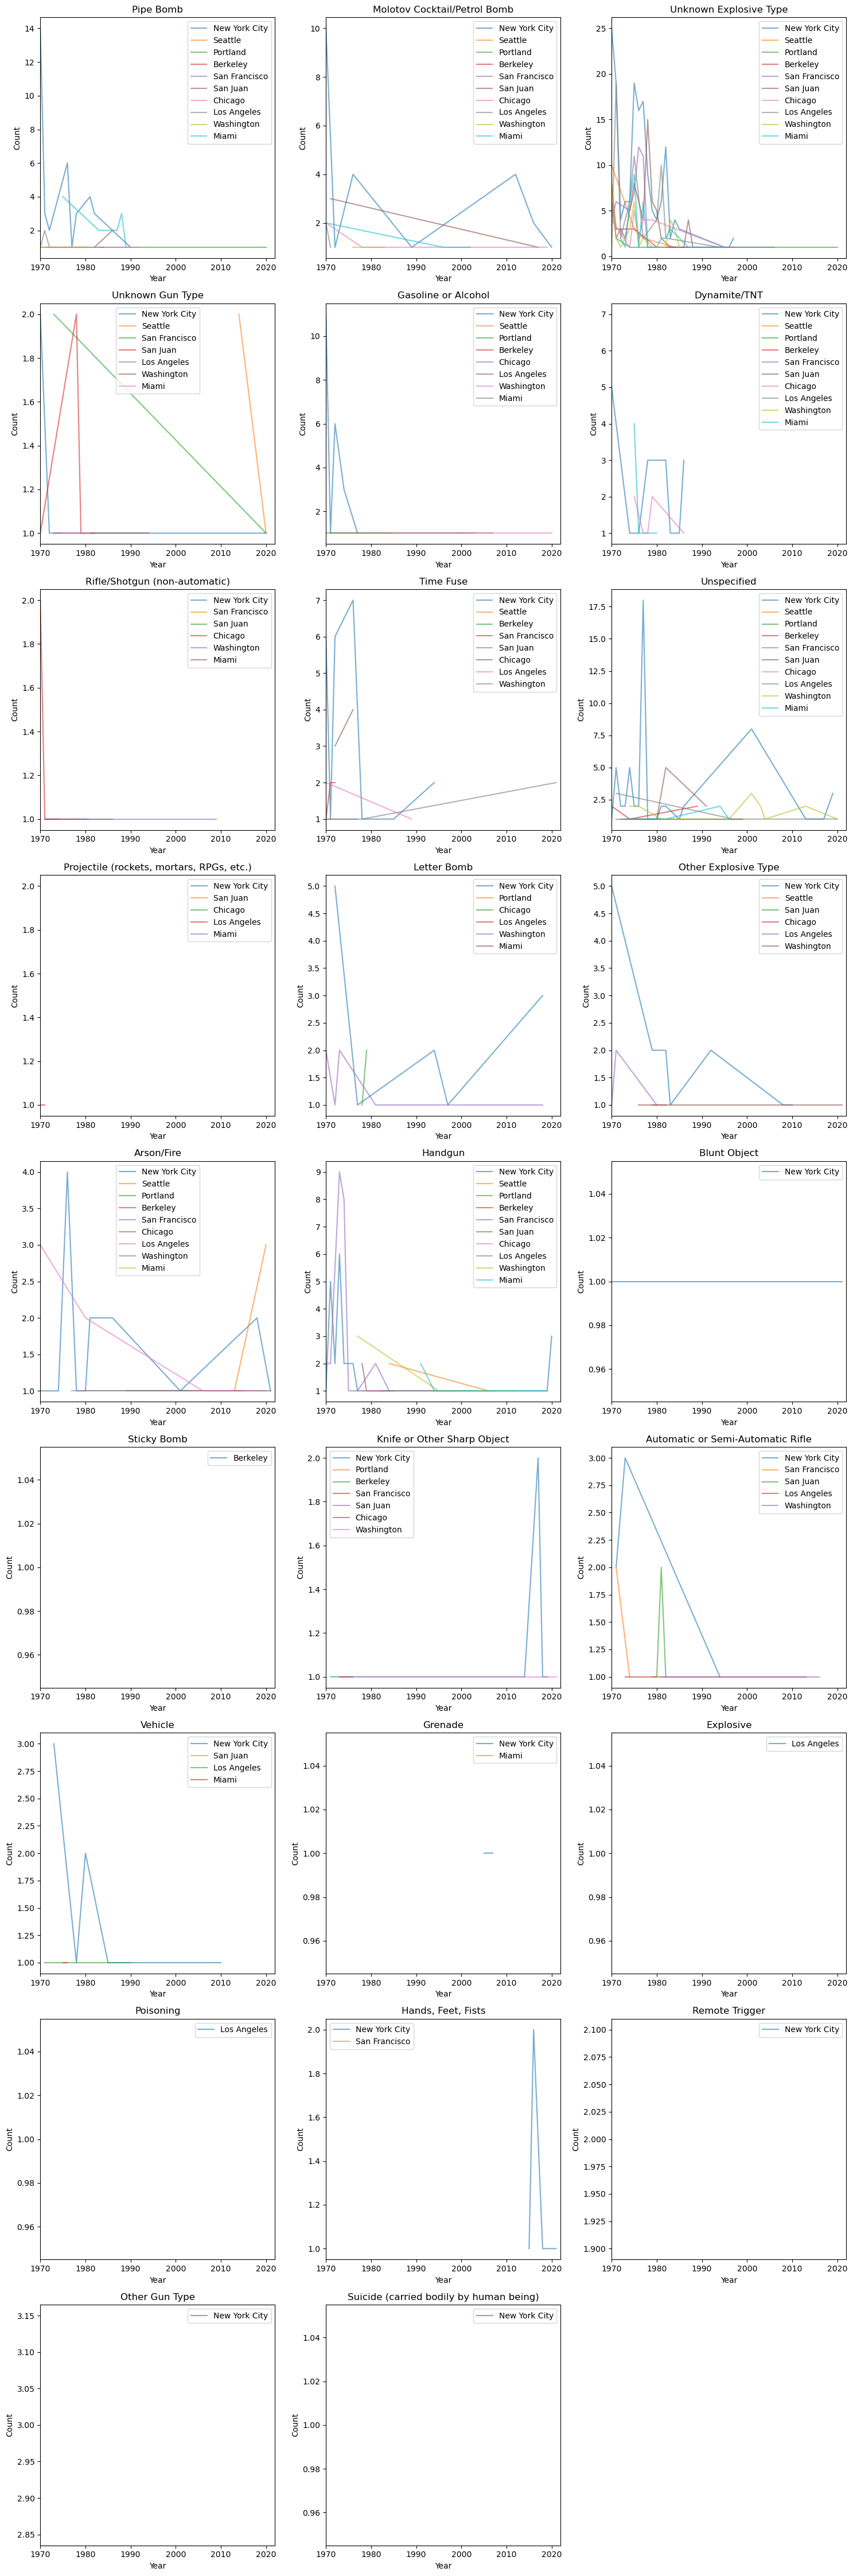

**************************************************
Analysis of values in nkill over time
**************************************************


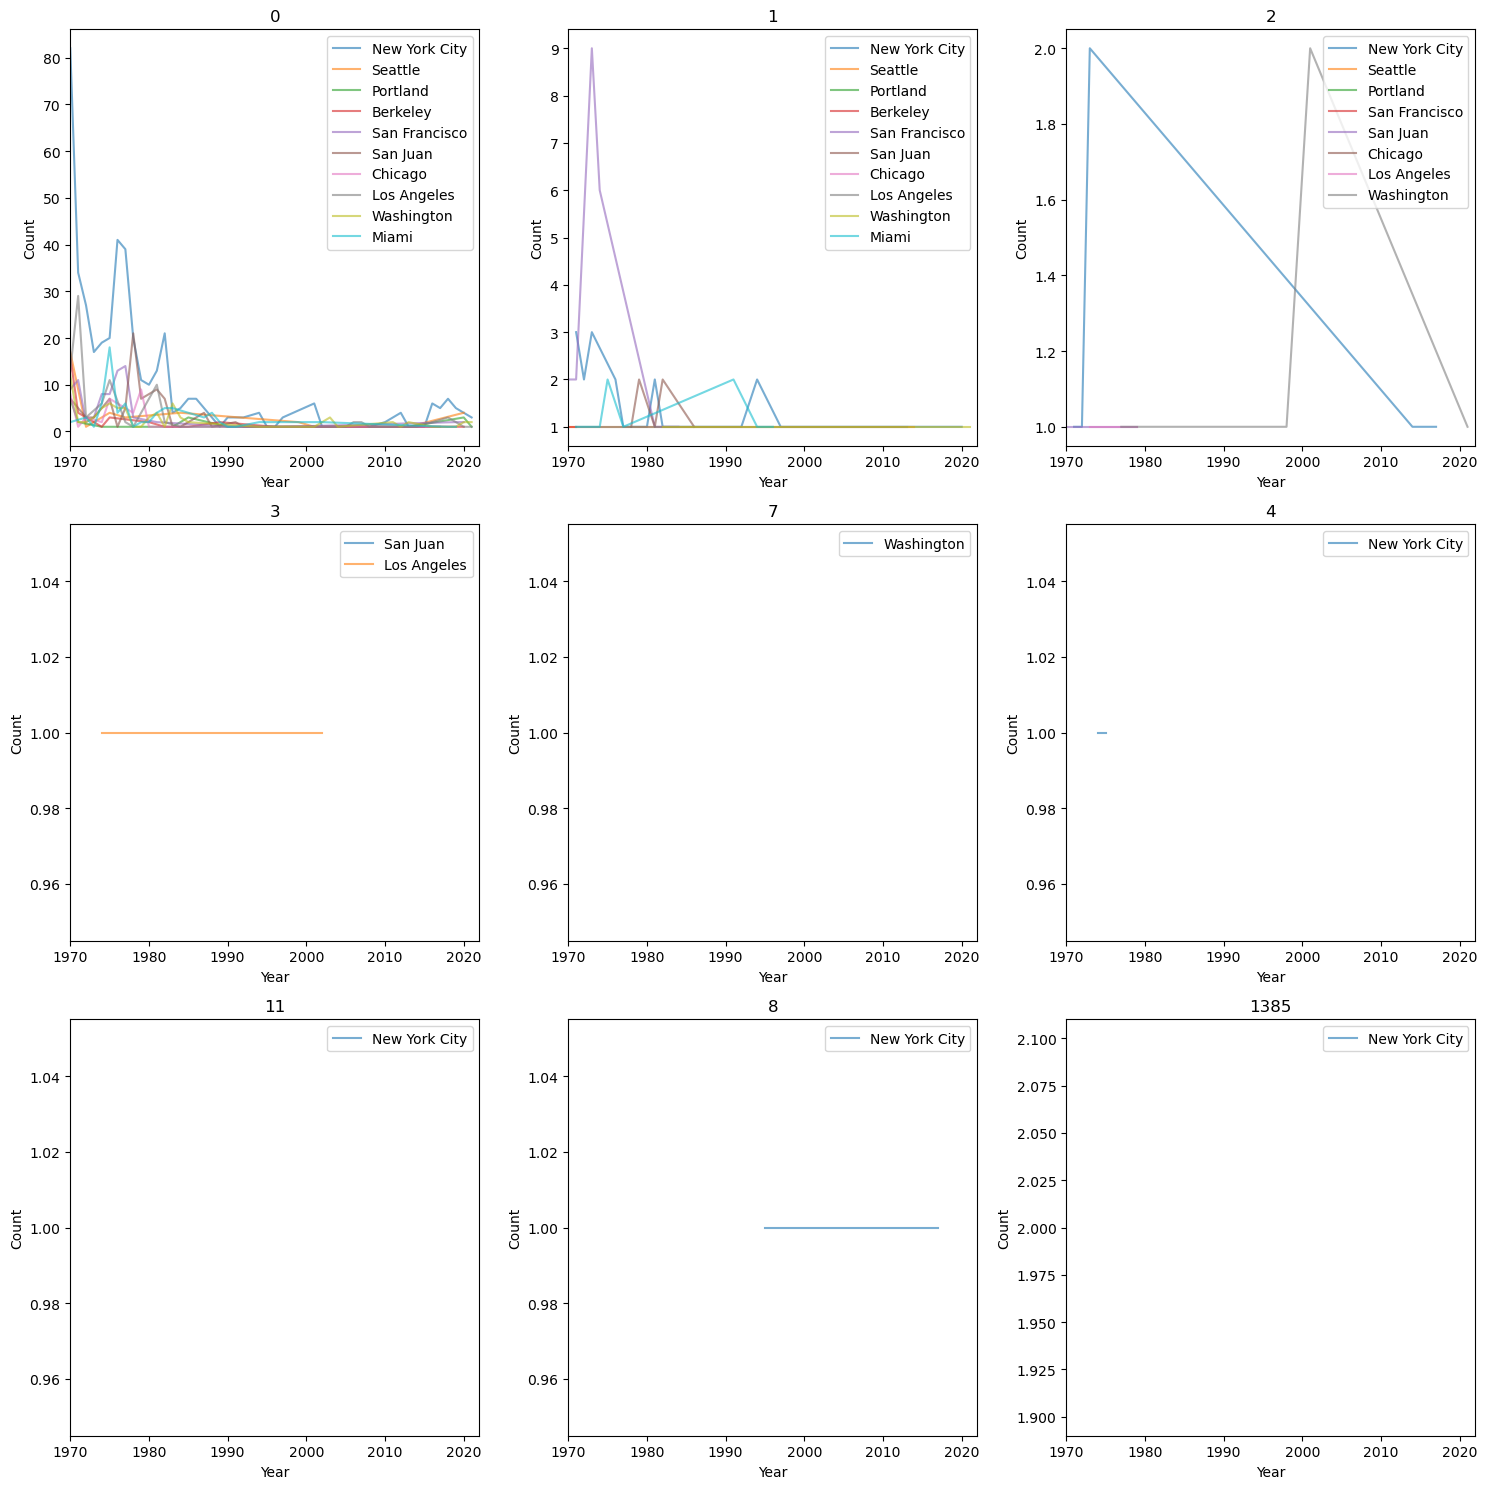

**************************************************
Analysis of values in nwound over time
**************************************************


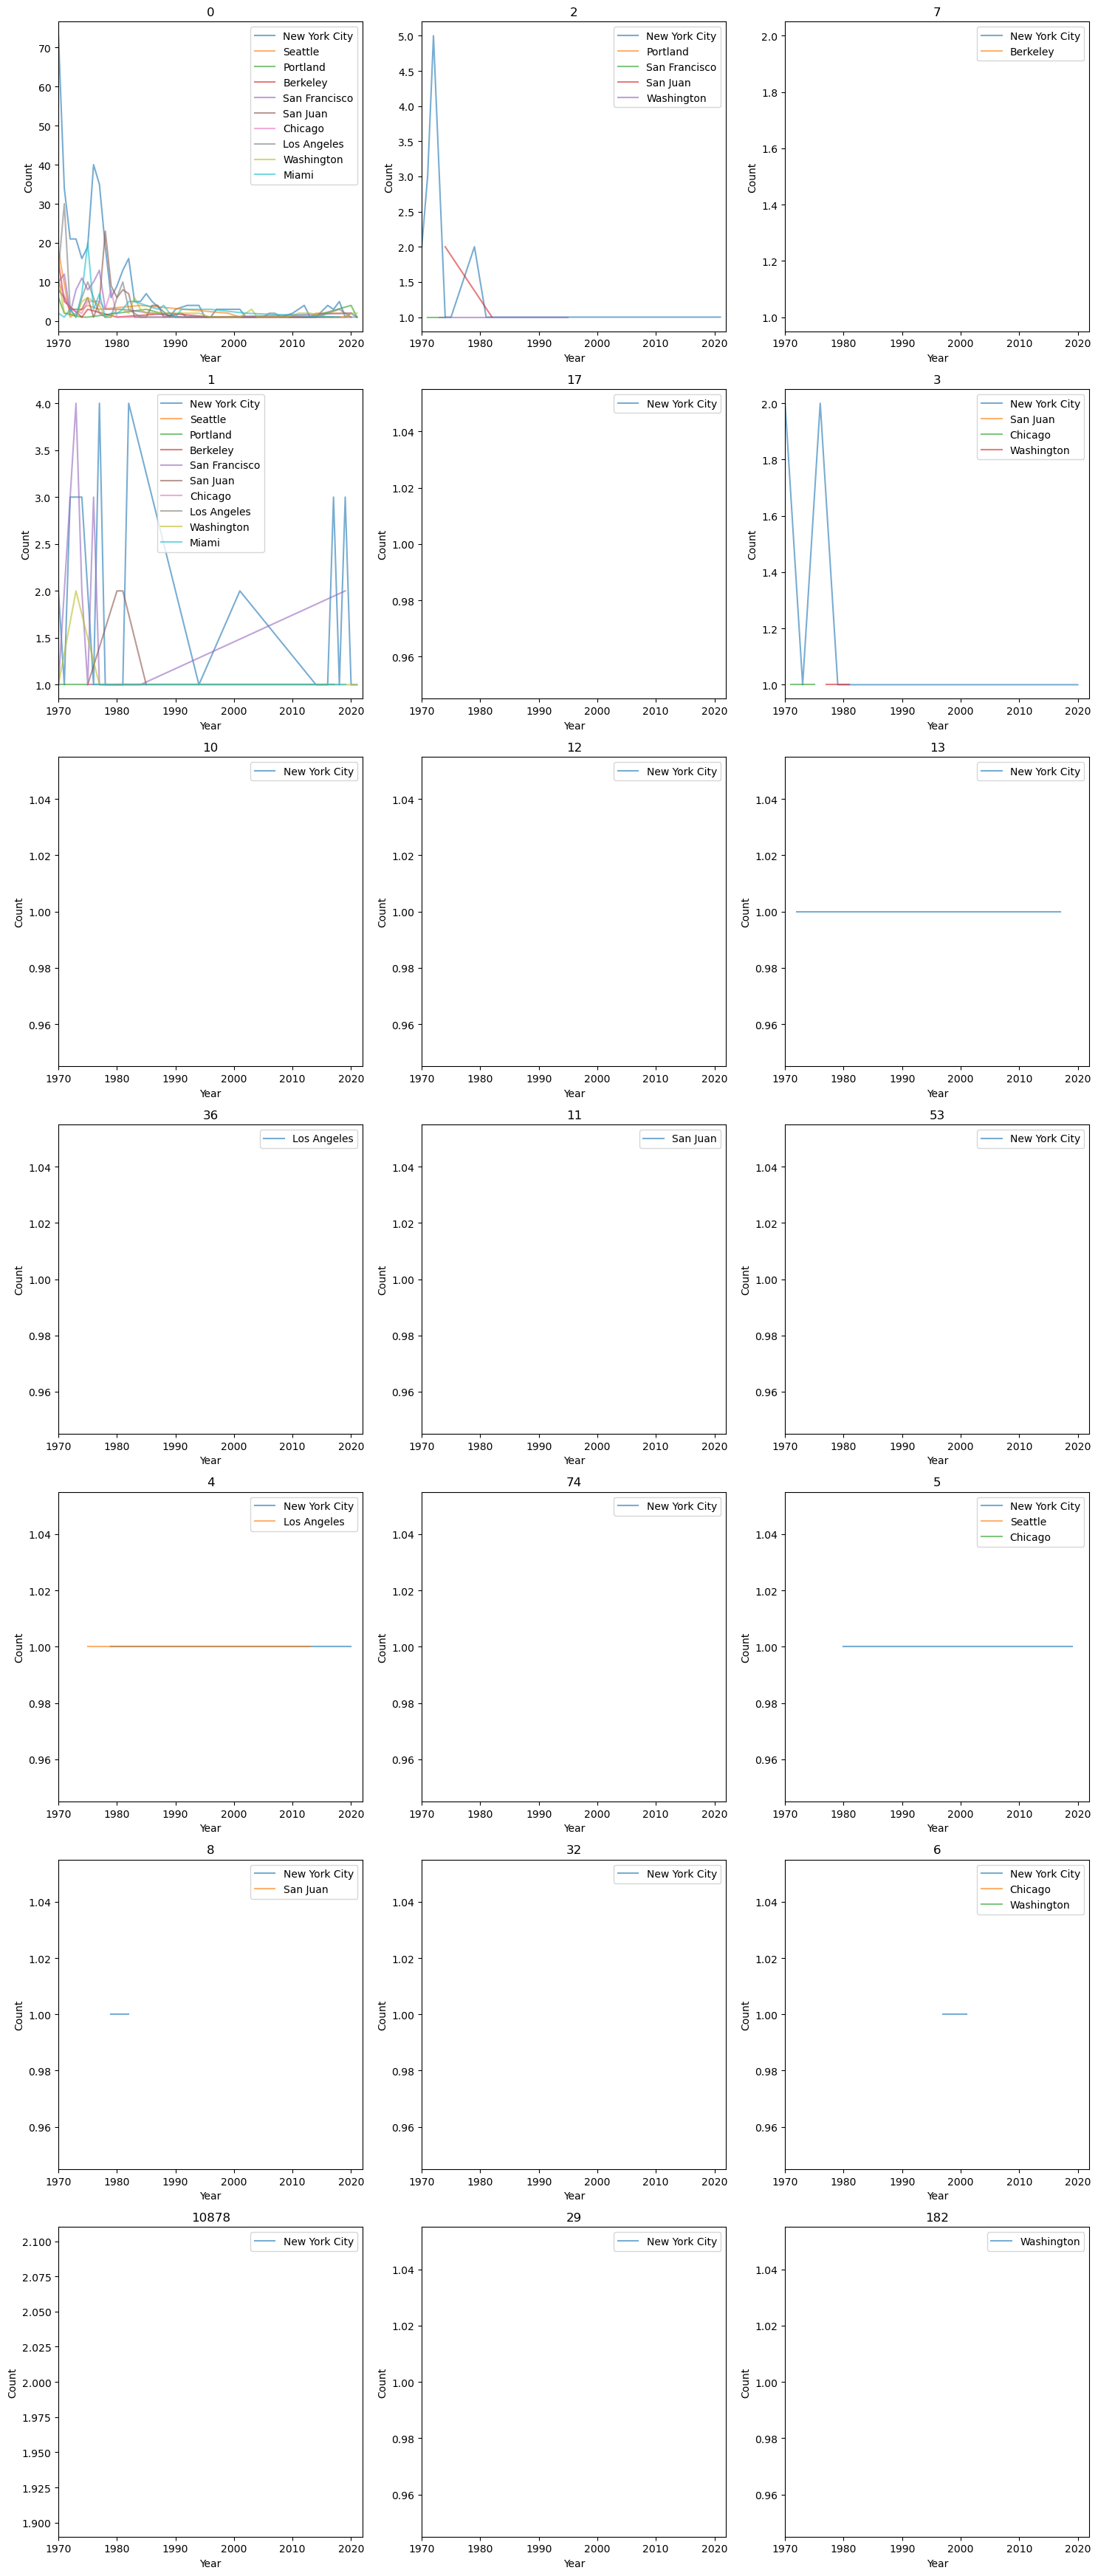

**************************************************
Analysis of values in nkillter over time
**************************************************


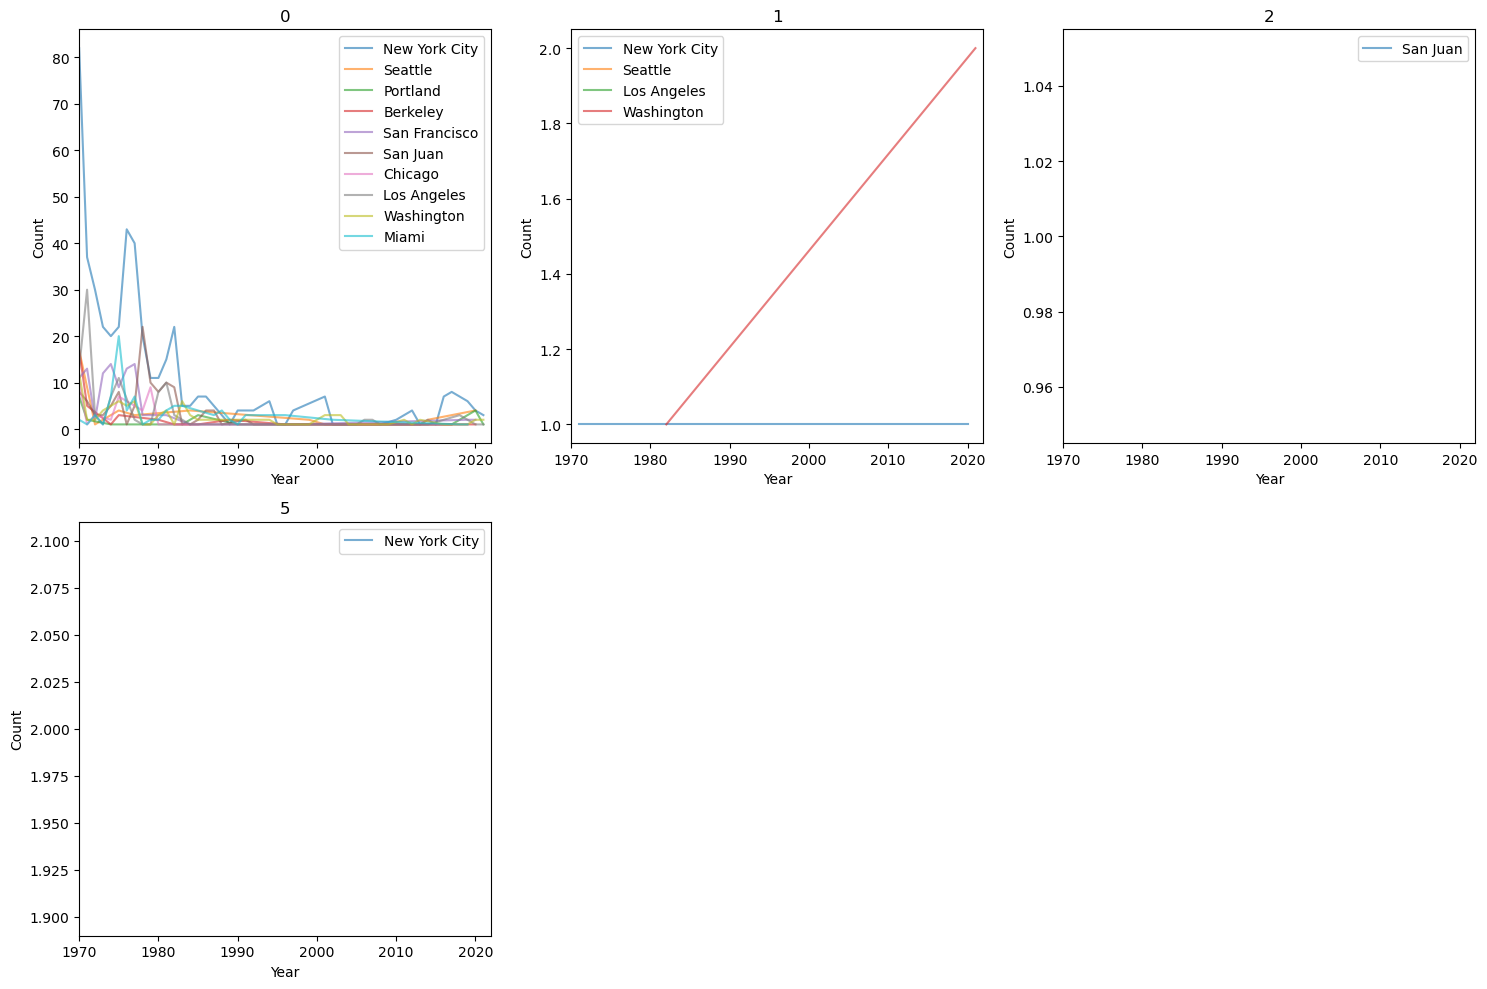

**************************************************
Analysis of values in success over time
**************************************************


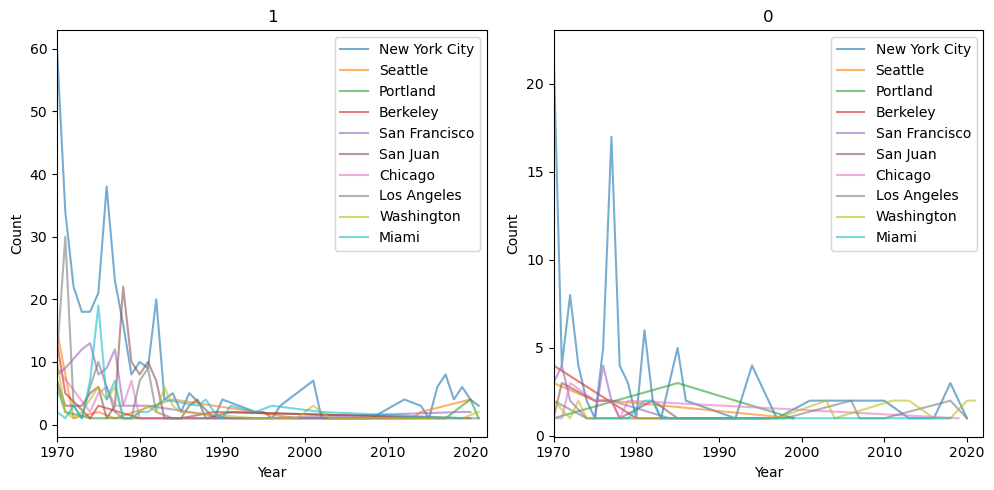

**************************************************
Analysis of values in propextent over time
**************************************************


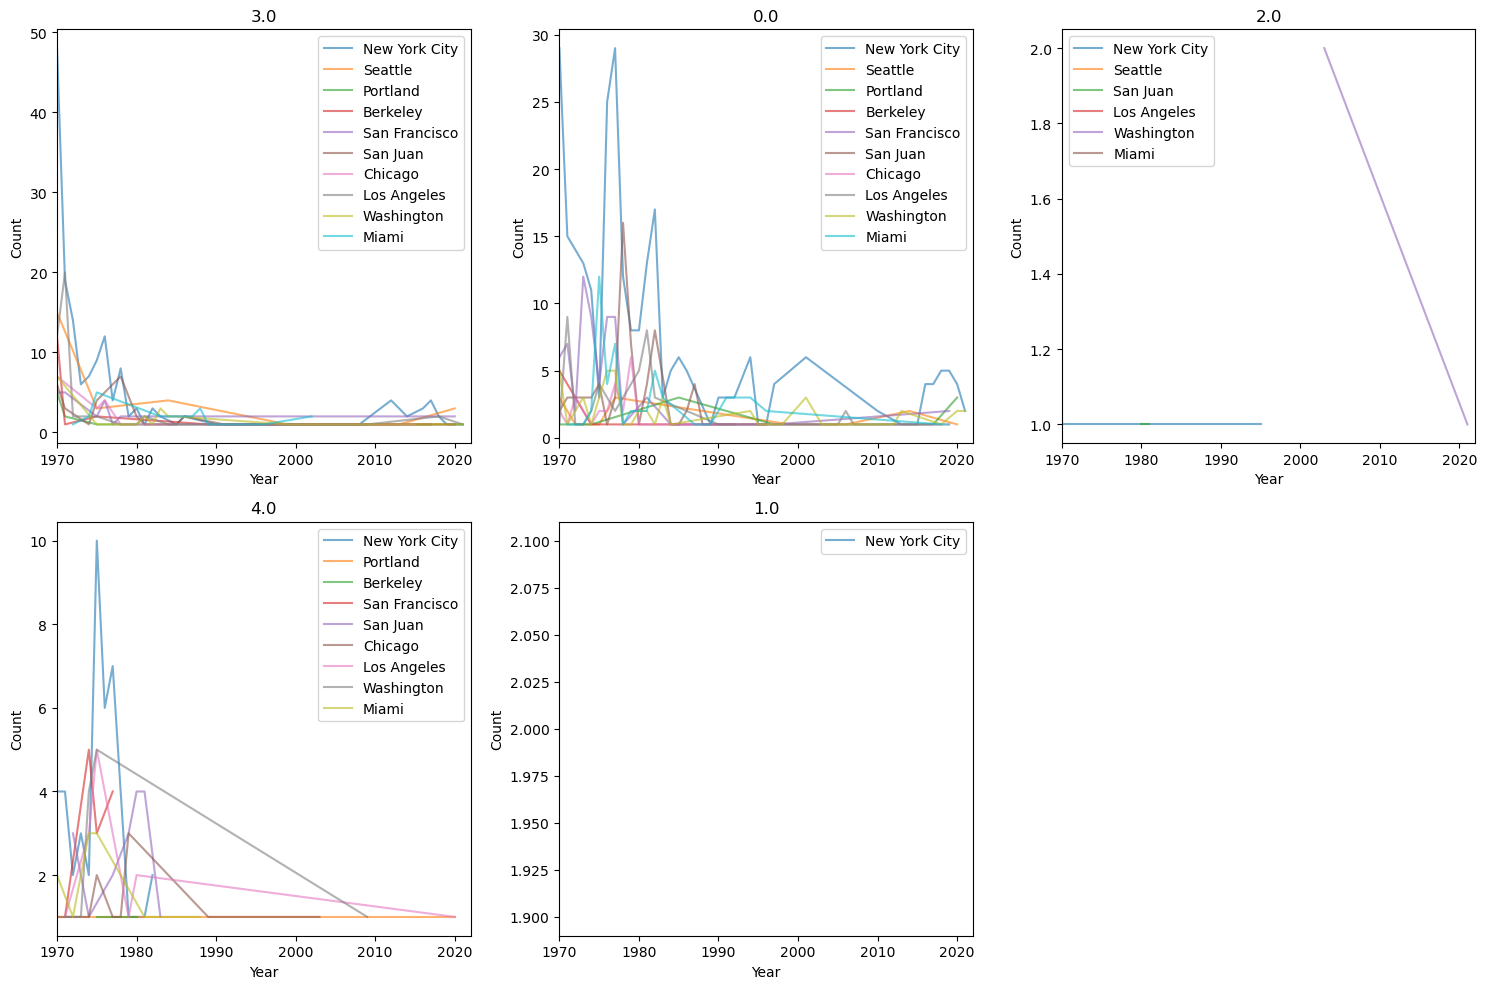

In [54]:
feat_over_time = ['targtype1_txt','targsubtype1_txt','weaptype1_txt','weapsubtype1_txt','nkill','nwound','nkillter','success','propextent']

for x in feat_over_time :
    print("*" * 50)
    print(f'Analysis of values in {x} over time')
    print("*" * 50)
    city_plot_by_feat(df_city_25, x)

In [59]:
box = ['nperps','nperpcap','nkill','nkillus','nkillter','nwound','nwoundus','nwoundte']
def citybox(df,features,city) :
    feats = features
    fig, ax = plt.subplots(nrows=1, ncols=(len(feats) - 1), figsize = (25,7))
    total_count = df[df['city'] == city].eventid.count()
    print("*" * 50)
    print(f"Distribution of features in {city}")
    print("*" * 50)
    print(f'{city} total incidents: {total_count}')
    for i, feature in enumerate(feats[1:]) :
        sns.boxplot(x=city, data=df[df['city'] == city], ax=ax[i])
        ax[i].set_title(feature)
        ax[i].set_xlabel(feature)
        ax[i].tick_params(axis='x', rotation=90)
        
        
    plt.tight_layout()
    #plt.subplots_adjust(wspace=5)
    plt.show();

In [61]:
sns.boxplot(x='city',y=['nperps'],data=df_city_25)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

### for int features, create bins or something (nkill, propexent, etc) and plot means over time

### Load a population dataset from wiki, look at ratios of feature vs population

### What other extra features can you look at? Presidential Election timelines, seasons, etc.

### The ultimate goal here: help an org like DHS train first responders effectively. This means they need to know what kinds of attacks, targets, and responsible parties they're most likely to deal with in a certain area based on certain conditions. For instance, what's more likely in NYC within the next six months - a bombing on an educational facility or an assassination attempt of a prominent political figure?

### Maybe a more reasonable question: What factors contribute to certain types of incidents? What makes a bombing more likely than a shooting? Perhaps I should engineer some features based on nationality or group. 

In [58]:
help(df.quantile)

Help on method quantile in module pandas.core.frame:

quantile(q: 'float | AnyArrayLike | Sequence[float]' = 0.5, axis: 'Axis' = 0, numeric_only: 'bool' = False, interpolation: 'QuantileInterpolation' = 'linear', method: "Literal['single', 'table']" = 'single') -> 'Series | DataFrame' method of pandas.core.frame.DataFrame instance
    Return values at the given quantile over requested axis.
    
    Parameters
    ----------
    q : float or array-like, default 0.5 (50% quantile)
        Value between 0 <= q <= 1, the quantile(s) to compute.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Equals 0 or 'index' for row-wise, 1 or 'columns' for column-wise.
    numeric_only : bool, default False
        Include only `float`, `int` or `boolean` data.
    
        .. versionchanged:: 2.0.0
            The default value of ``numeric_only`` is now ``False``.
    
    interpolation : {'linear', 'lower', 'higher', 'midpoint', 'nearest'}
        This optional parameter specifies the 